
# Using Machine Learning To Predict Diagnosis of a Breast Cancer

## **1. Identify the problem**

Breast cancer is the most common malignancy among women, accounting for nearly 1 in 3 cancers diagnosed among women in the United States, and it is the second leading cause of cancer death among women. Breast Cancer occurs as a results of abnormal growth of cells in the breast tissue, commonly referred to as a Tumor. A tumor does not mean cancer - tumors can be benign (not cancerous), pre-malignant (pre-cancerous), or malignant (cancerous). Tests such as MRI, mammogram, ultrasound and biopsy are commonly used to diagnose breast cancer performed.

### **1.1 Expected outcome**

Given breast cancer results from breast fine needle aspiration (FNA) test (is a quick and simple procedure to perform, which removes some fluid or cells from a breast lesion or cyst (a lump, sore or swelling) with a fine needle similar to a blood sample needle). Since this build a model that can classify a breast cancer tumor using two training classification:

1= Malignant (Cancerous) - Present
0= Benign (Not Cancerous) -Absent

### **1.2 Objective**

Since the labels in the data are discrete, the predication falls into two categories, (i.e. Malignant or benign). In machine learning this is a classification problem.

Thus, the goal is to classify whether the breast cancer is benign or malignant and predict the recurrence and non-recurrence of malignant cases after a certain period. To achieve this we have used machine learning classification methods to fit a function that can predict the discrete class of new input.

### **1.3 Identify data sources**

The Breast Cancer datasets is available machine learning repository maintained by the University of California, Irvine. The dataset contains 569 samples of malignant and benign tumor cells.

The first two columns in the dataset store the unique ID numbers of the samples and the corresponding diagnosis (M=malignant, B=benign), respectively.
The columns 3-32 contain 30 real-value features that have been computed from digitized images of the cell nuclei, which can be used to build a model to predict whether a tumor is benign or malignant.


### import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
#pd.pandas.set_option("display.max_rows",None)
#pd.pandas.set_option("display.max_columns", None)

In [2]:
df=pd.read_csv("C://Users//Dell//Documents//eduonix assignments//assignments question//DS May - 21st Oct/data.csv")

In [3]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [4]:
df.shape

(569, 33)

In [5]:
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
count     569.000000  ...     569.000000       569.000000   569.000000   
mean        0.181162  ...      25.677223       107.261213   880.583128   
std         0.027414  ...       6.146258        33.602542   569.356993   
min         0.106000  ...      12.020000        50.410000   185.200000   
25%         0.161900  ...      21.080000        84.110000   515.300000   
50%         0.179200  ...      25.410000        97.660000   686.500000   
75%         0.195700  ...      29.720000       125.400000  1084.000000   
max         0.304000  ...      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

       Unnamed: 32  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 32 columns]

In [6]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
df.drop("Unnamed: 32", axis=1, inplace=True)
df.drop("id", axis=1, inplace=True)

In [8]:
df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...         

In [9]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [10]:
df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...         

### column sepeation

In [11]:
categorical_columns= df.columns[df.dtypes== "object"]
numeric_columns= df.columns[df.dtypes!= "object"]

In [12]:
categorical_columns

Index(['diagnosis'], dtype='object')

In [13]:
numeric_columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

### 2. Statistics Based Analysis and Graph Based Analysis

In [14]:
df[numeric_columns].describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

In [15]:
df[categorical_columns].describe()

diagnosis
count        569
unique         2
top            B
freq         357

### lets check categorical columns

In [16]:
for i in categorical_columns:
    print(df[i].value_counts())

B    357
M    212
Name: diagnosis, dtype: int64


#### we cannotb display categorical values in graphs so moving ahead

### lets check numerical columns

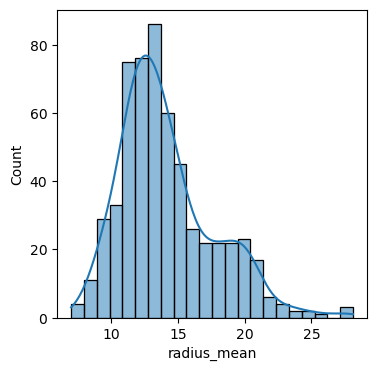

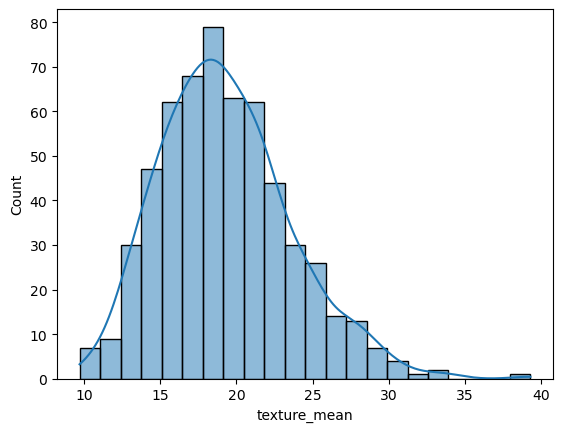

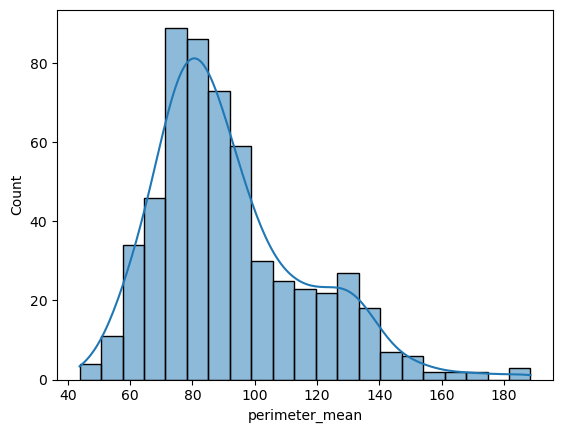

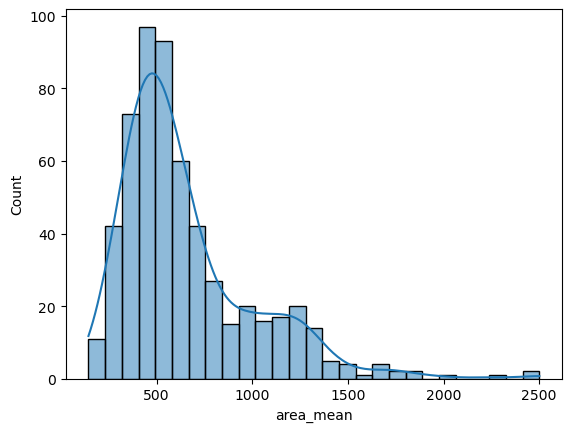

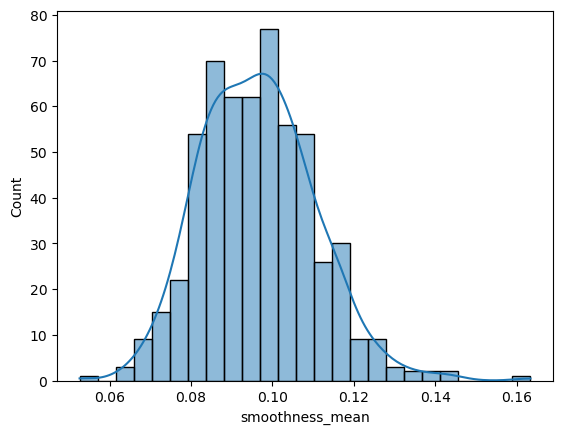

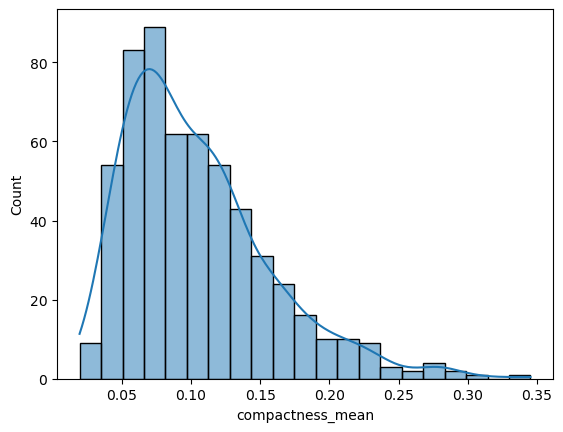

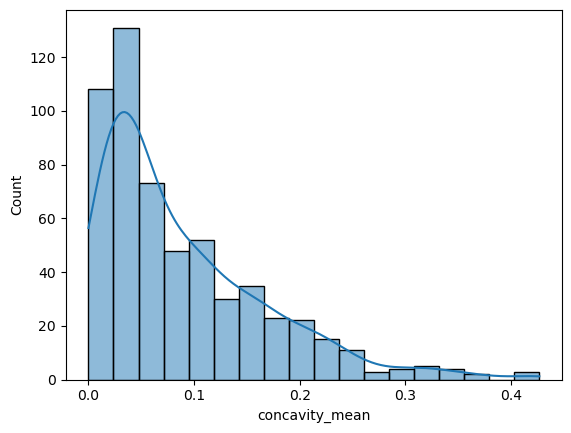

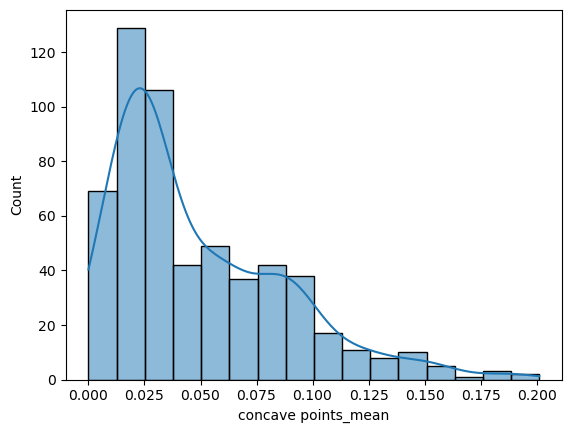

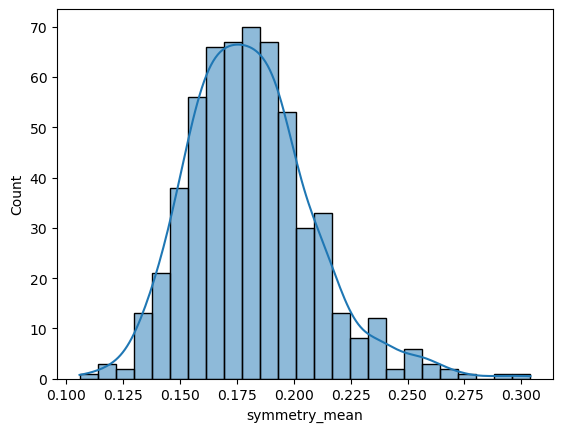

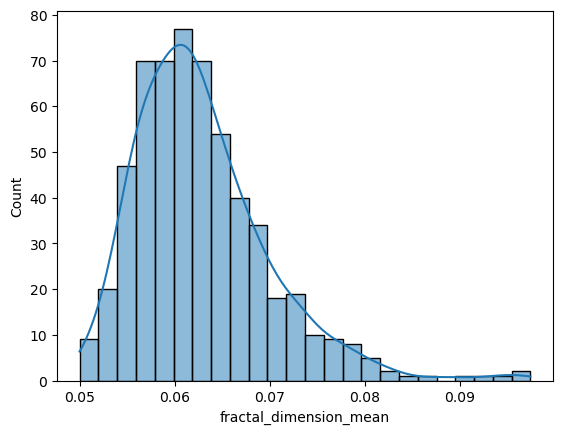

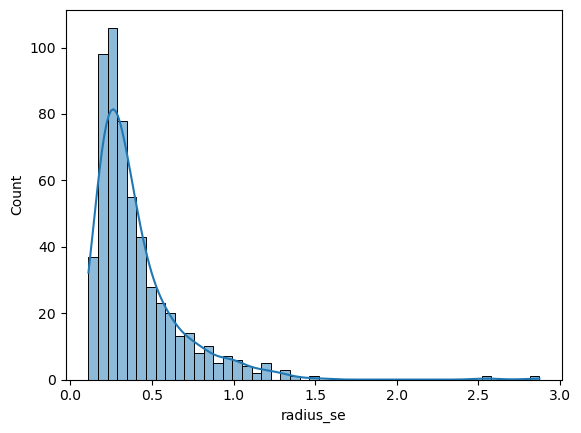

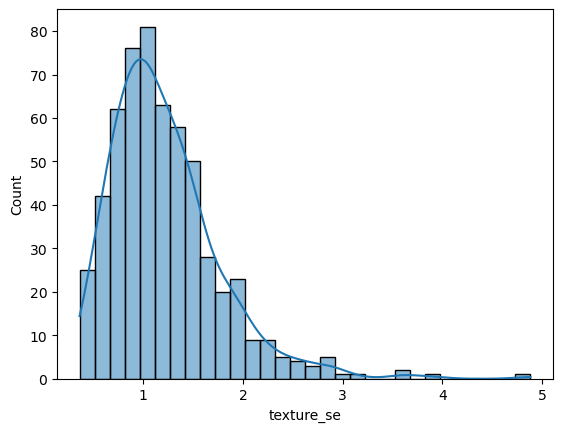

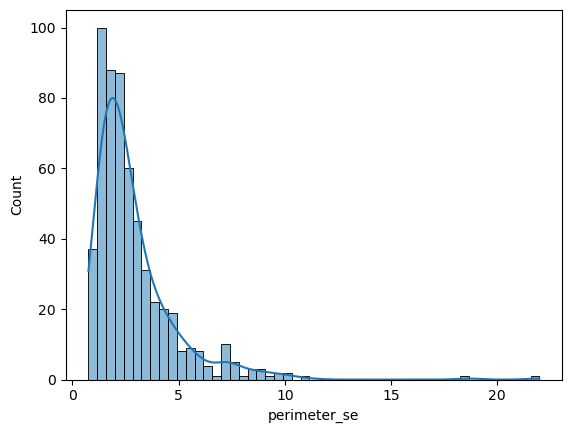

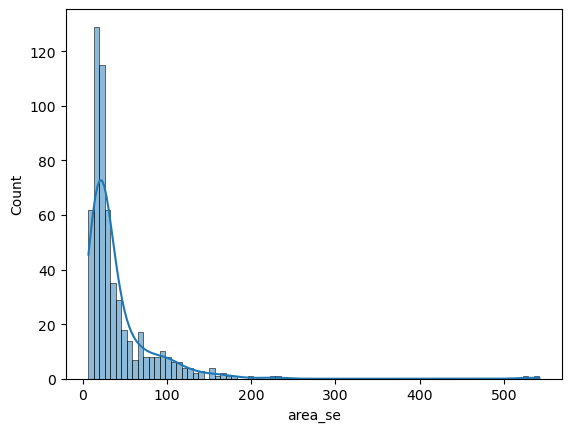

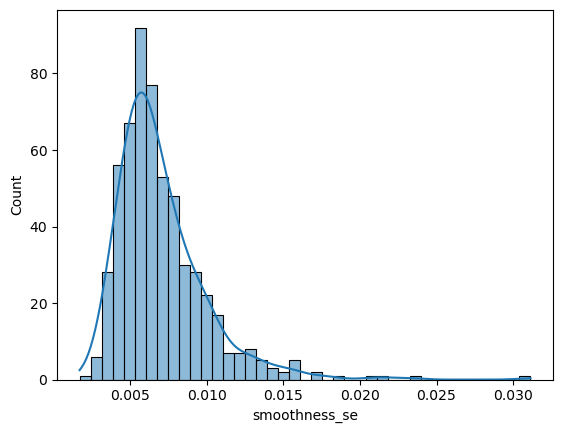

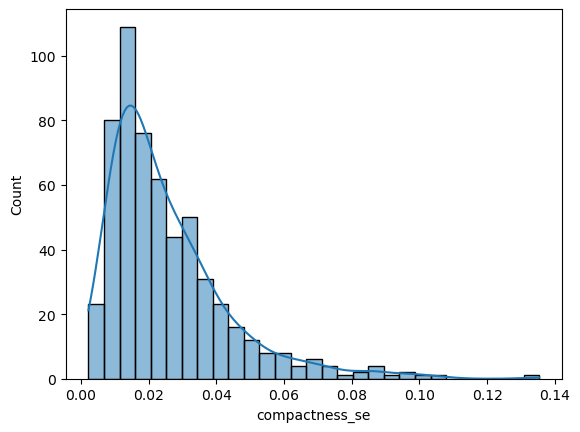

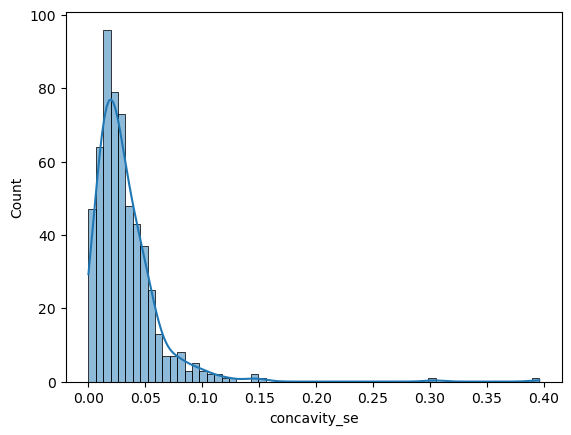

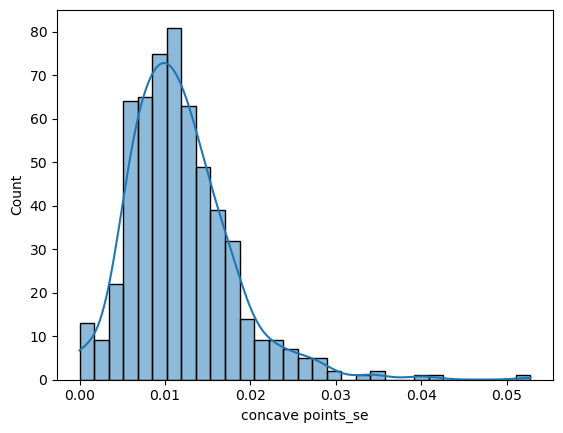

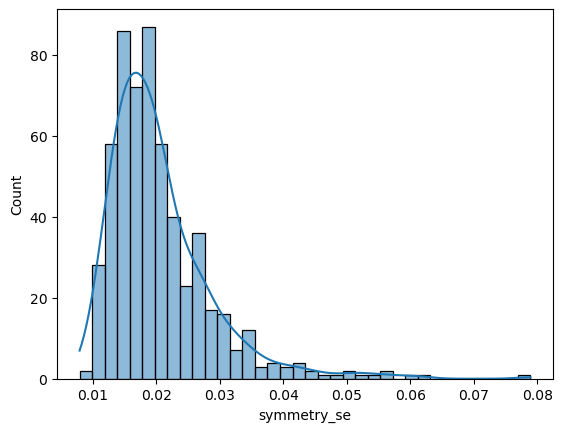

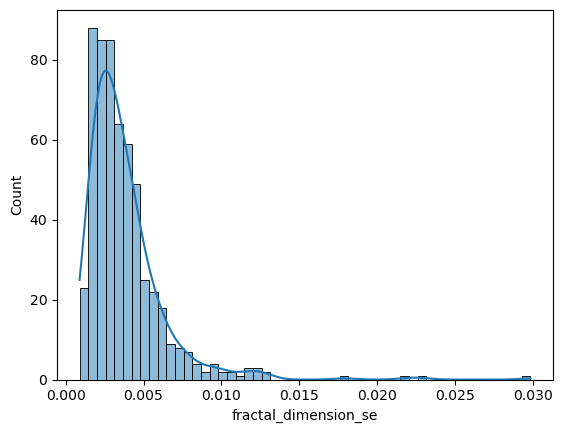

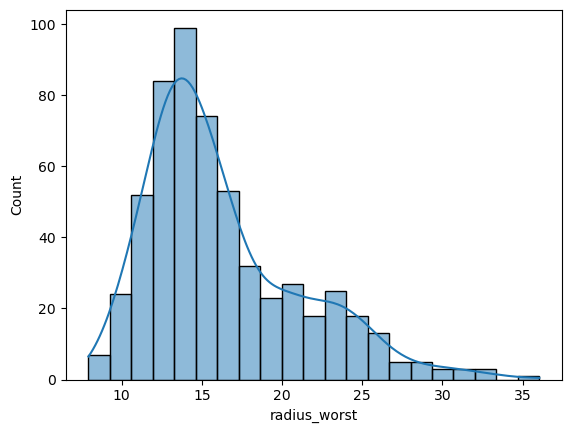

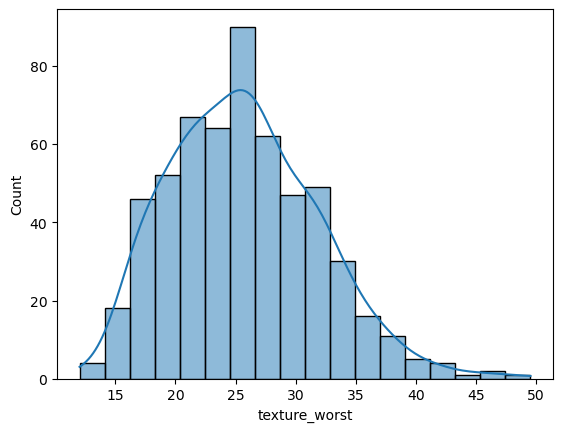

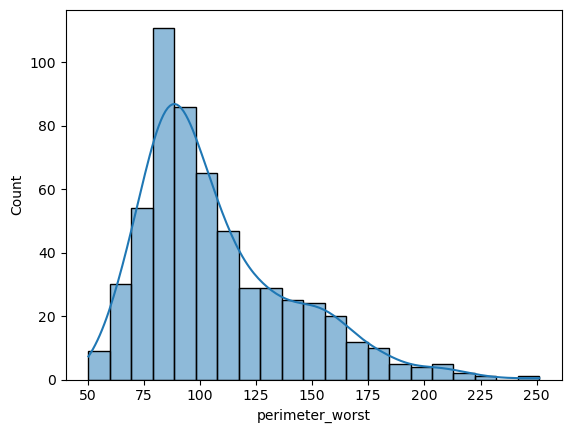

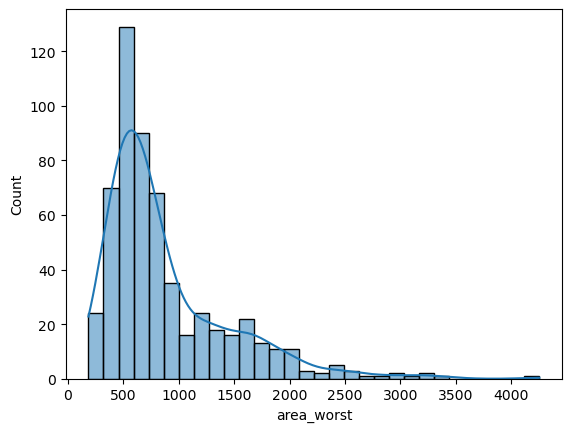

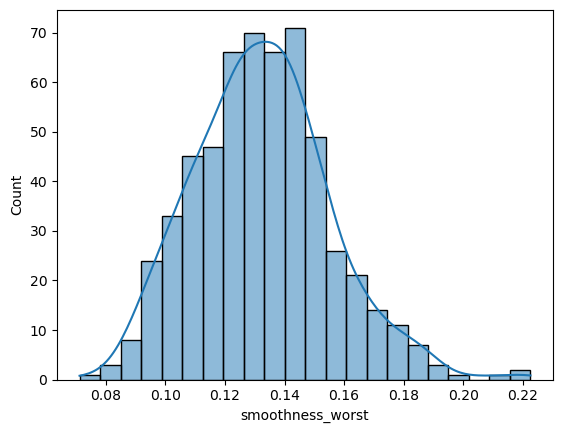

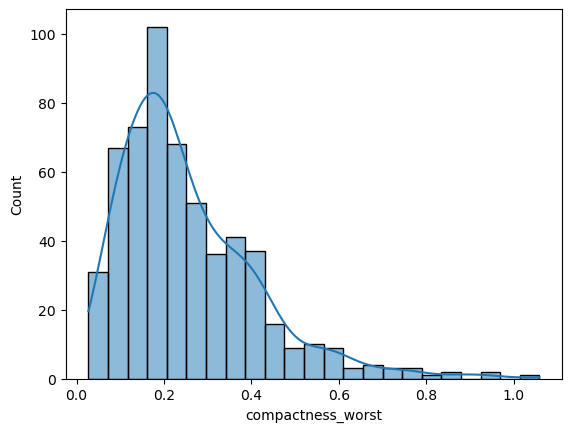

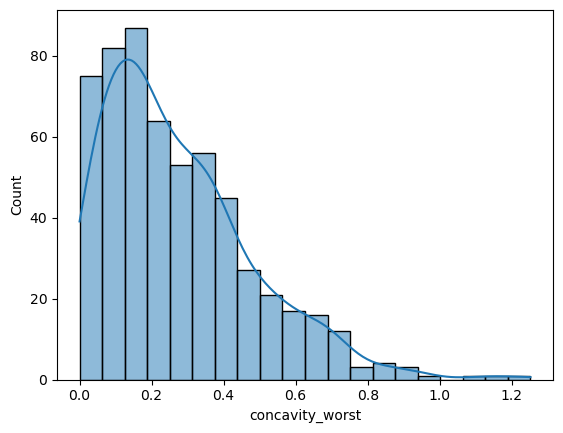

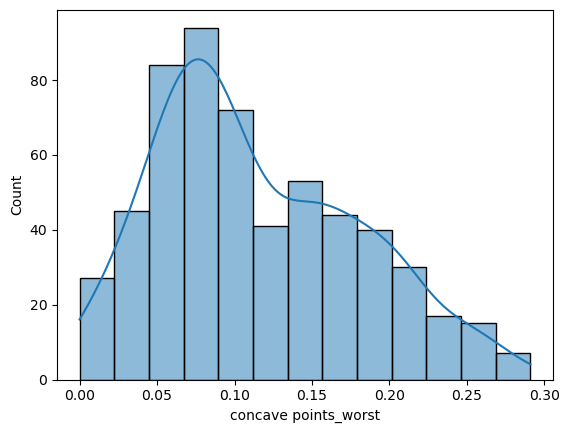

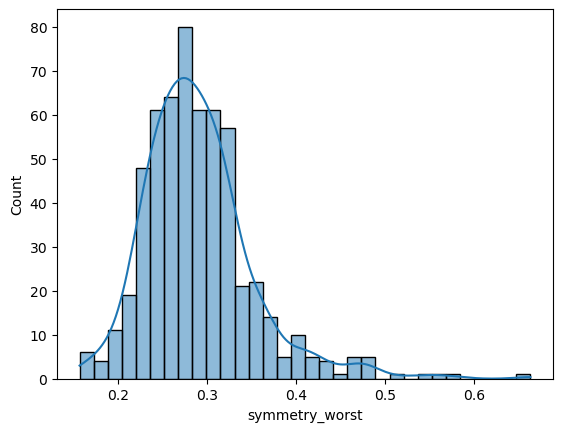

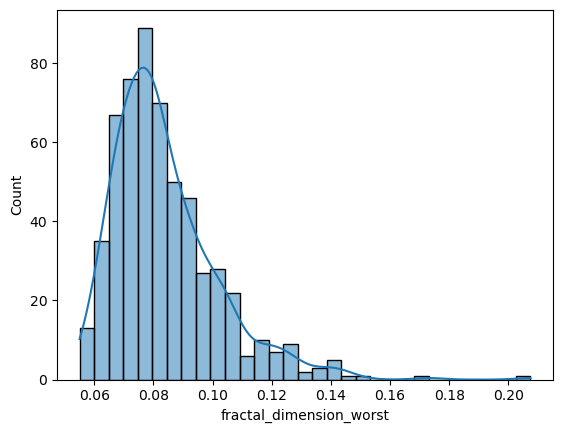

In [17]:
plt.figure(figsize=(4,4))
for i in numeric_columns:
    sns.histplot(data=df, x=i, kde=True)
    print("\n")
    plt.show()

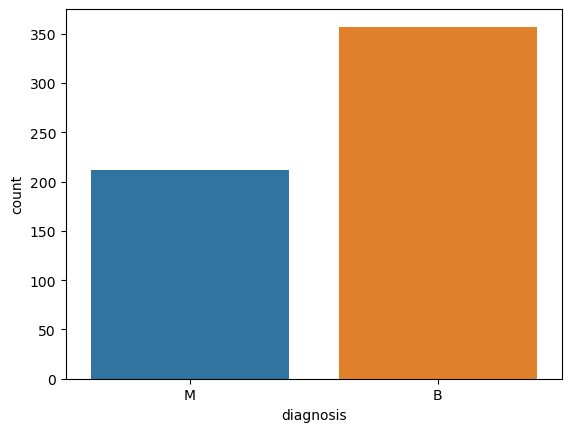

In [18]:
for i in categorical_columns:
    sns.countplot(data= df, x=i)
    plt.show()

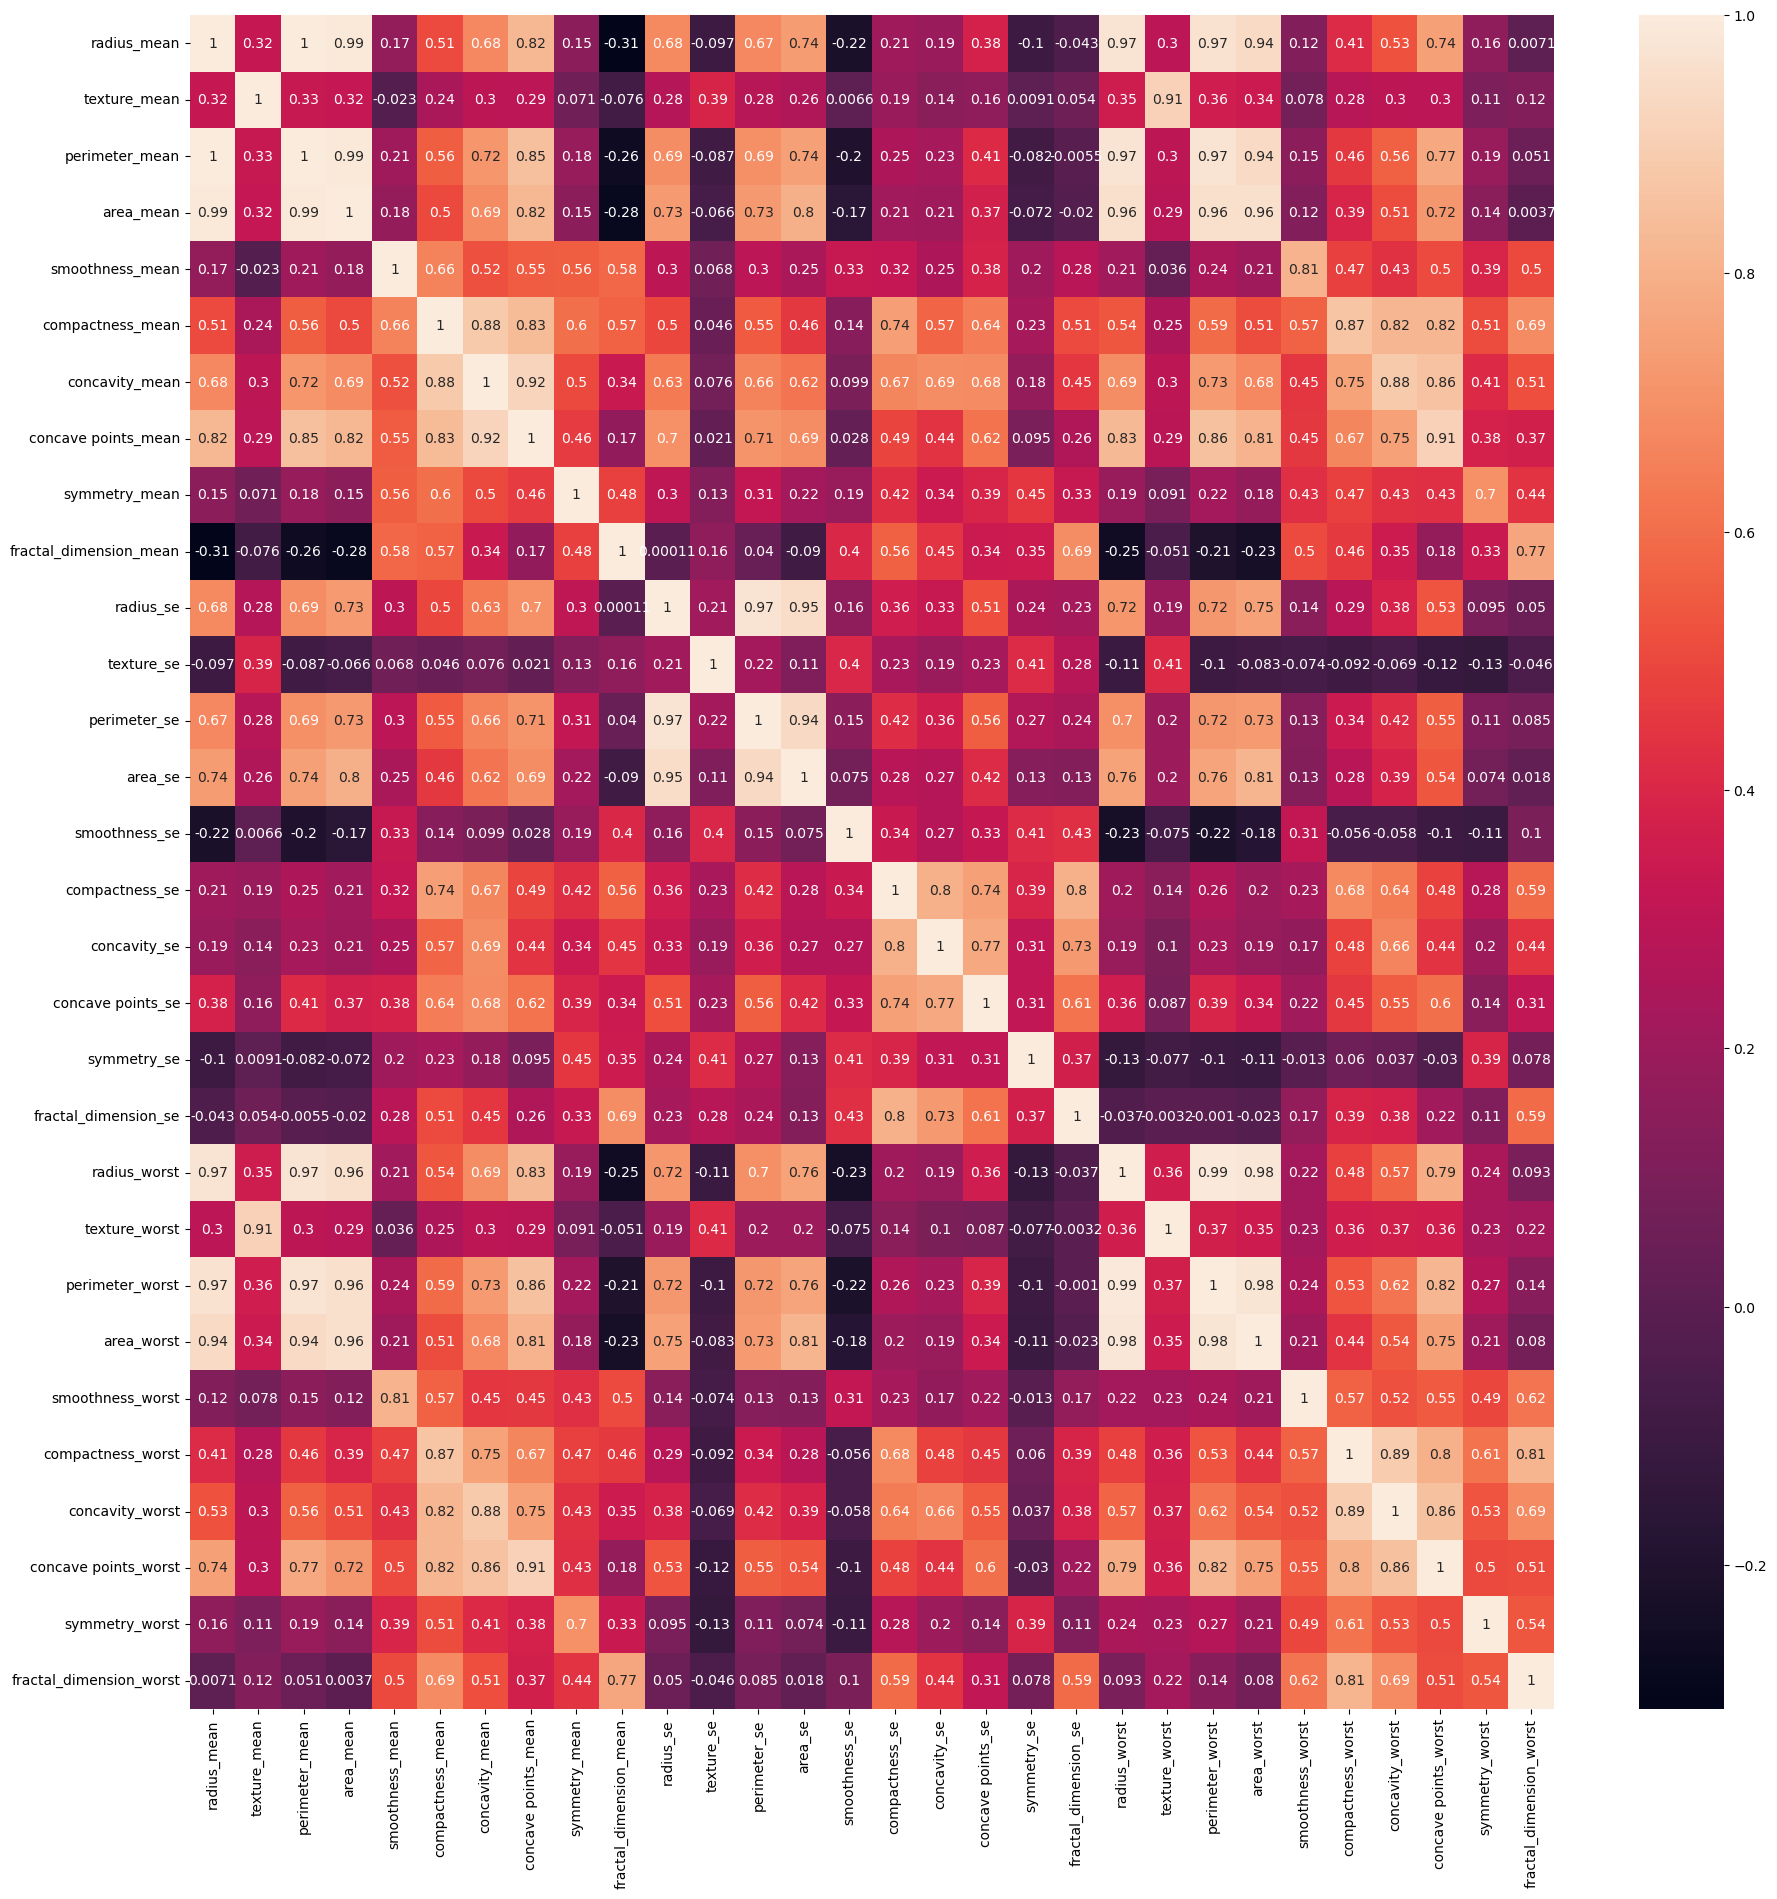

In [19]:
plt.figure(figsize=(22,22))
sns.heatmap(df.corr(), annot=True)
plt.show()

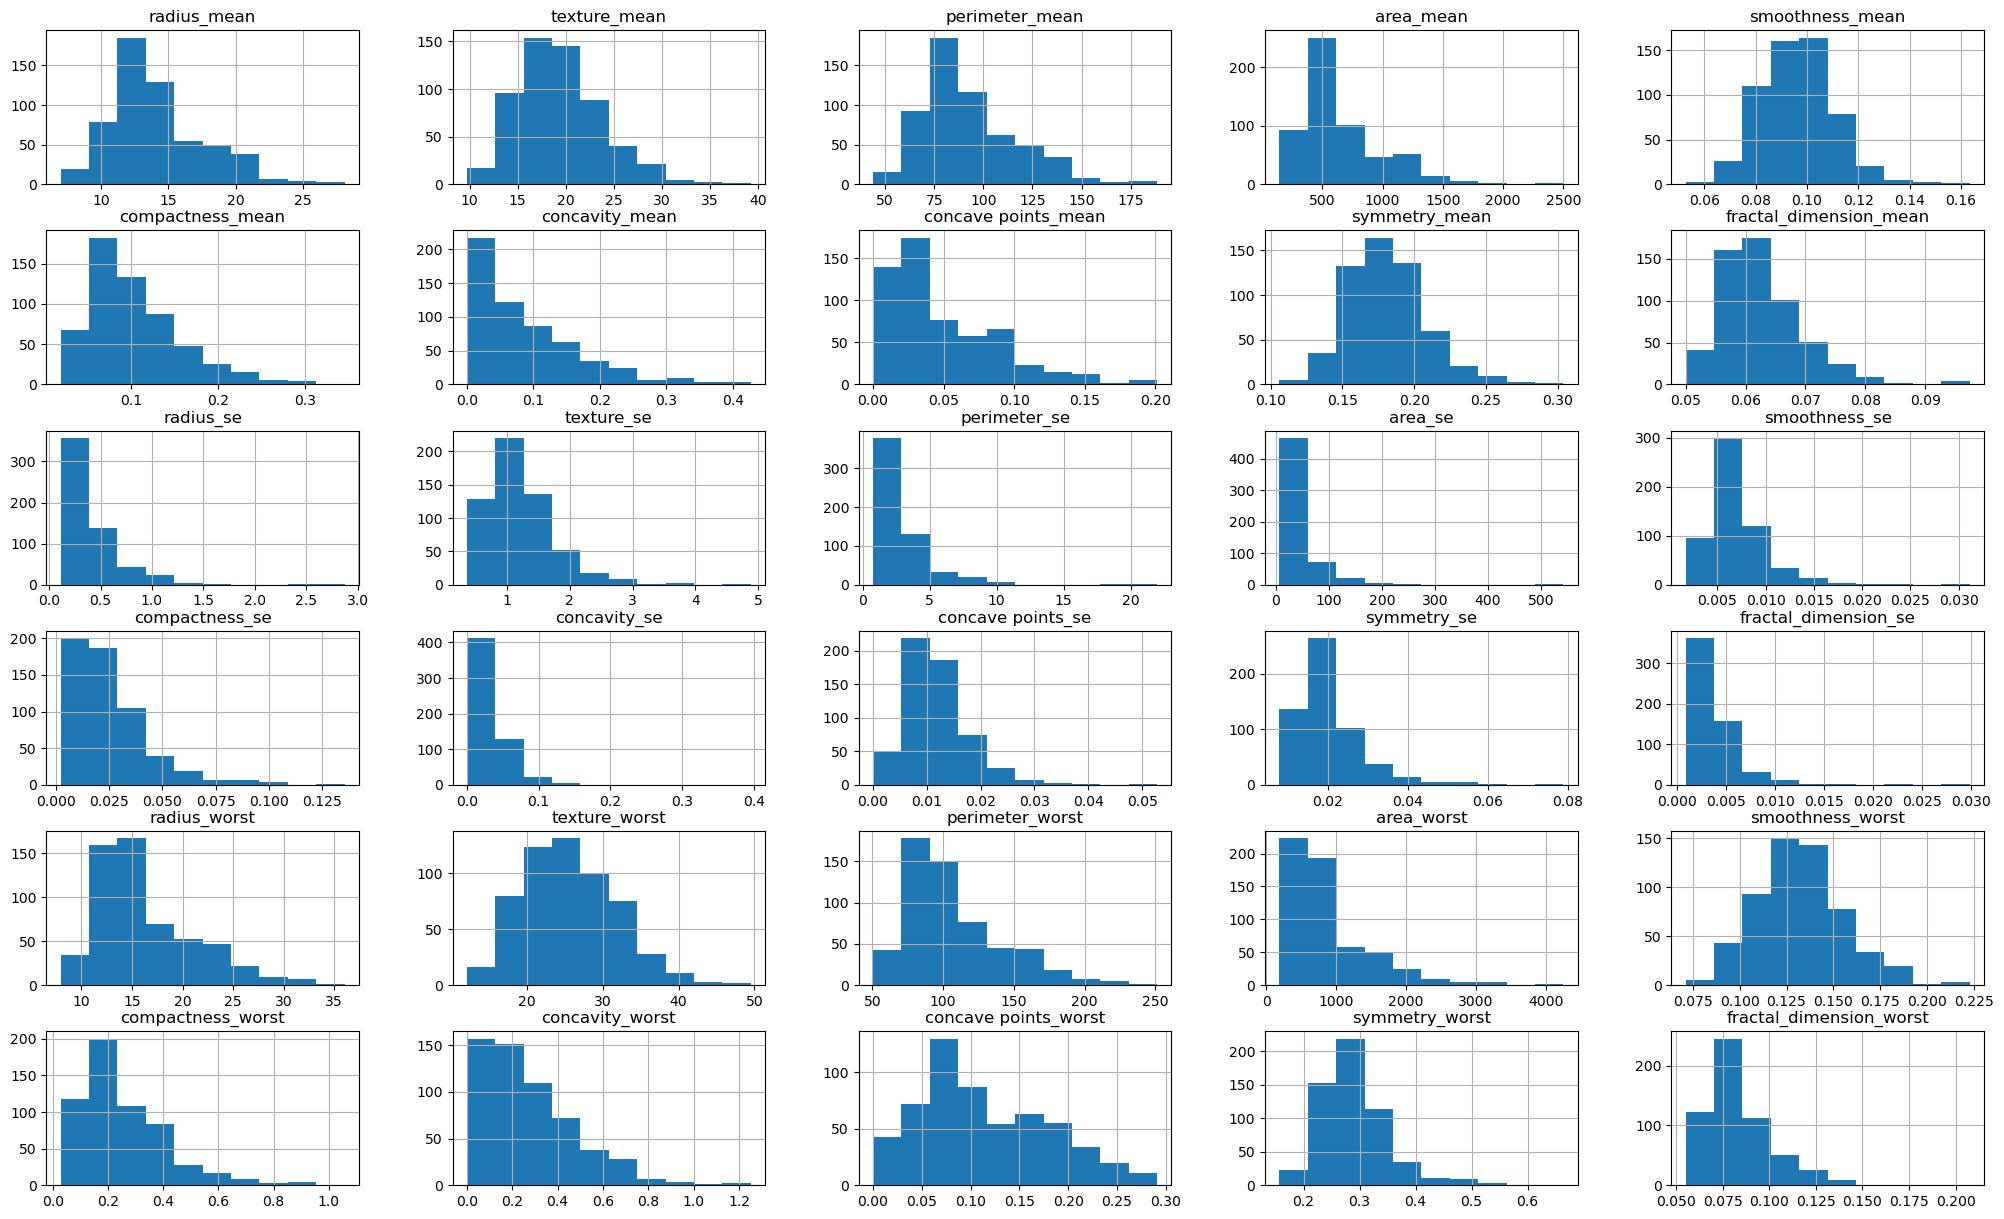

In [20]:

df.hist(figsize=(25,15))
plt.show()

In [2]:
#commentin this line to reduce overall file size less than 25mb 
#sns.pairplot(df, hue="diagnosis")
#plt.show()

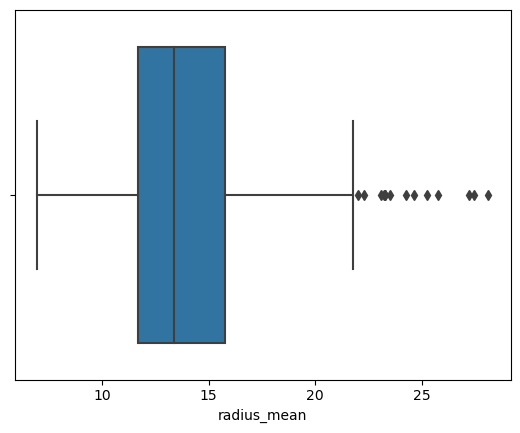

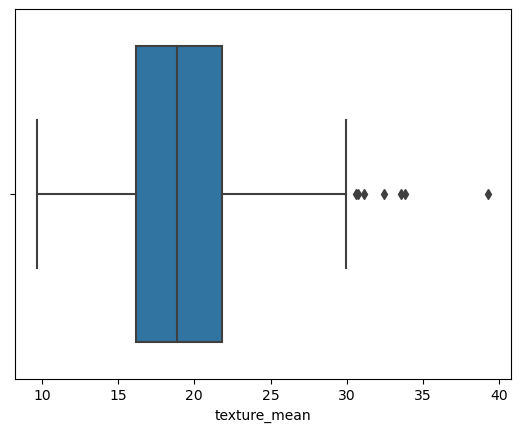

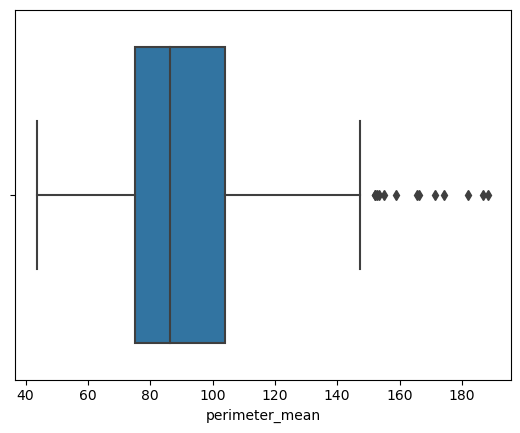

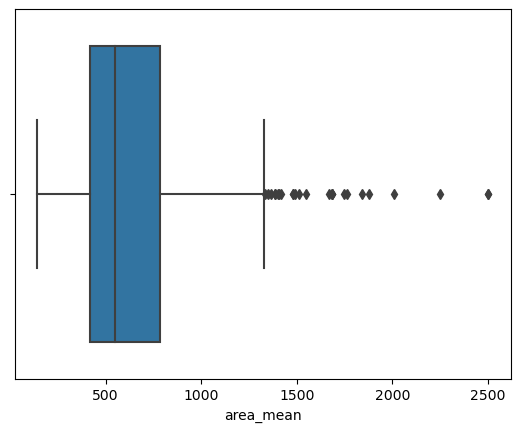

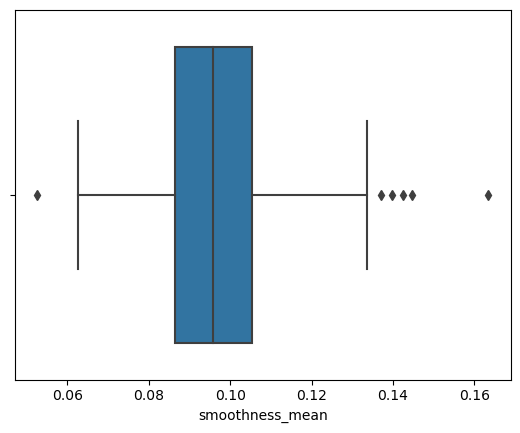

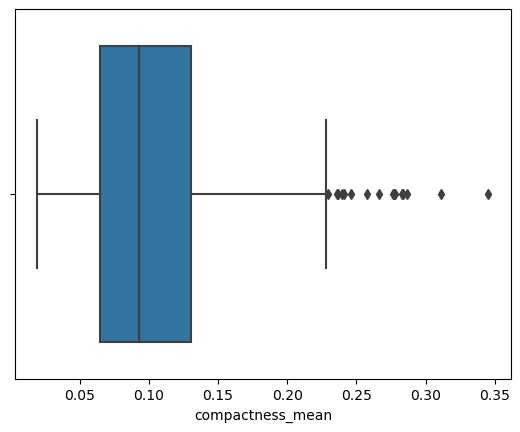

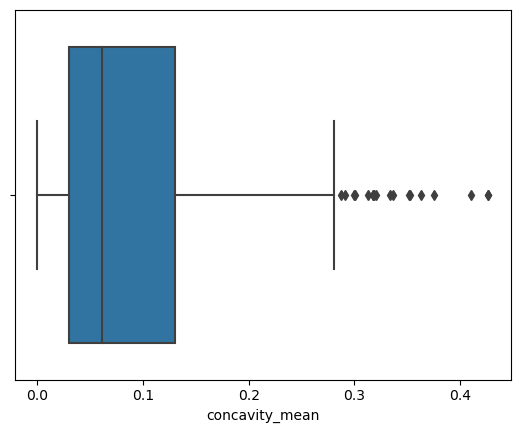

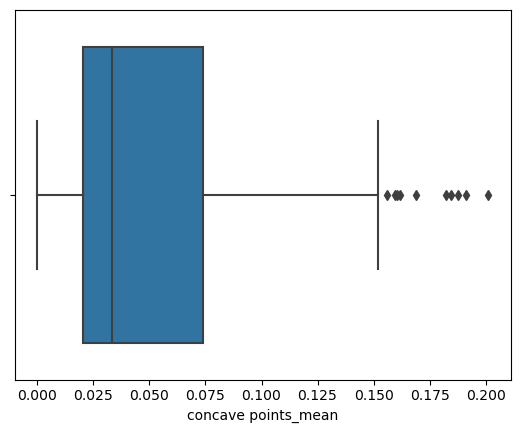

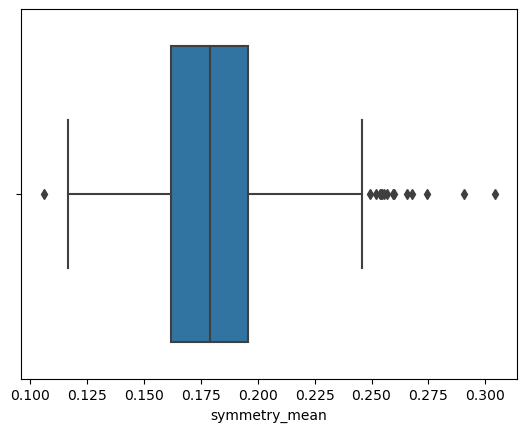

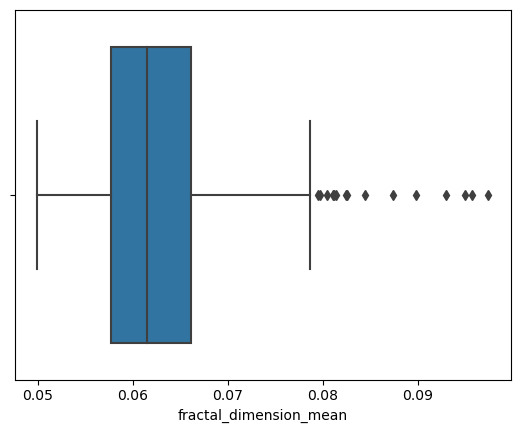

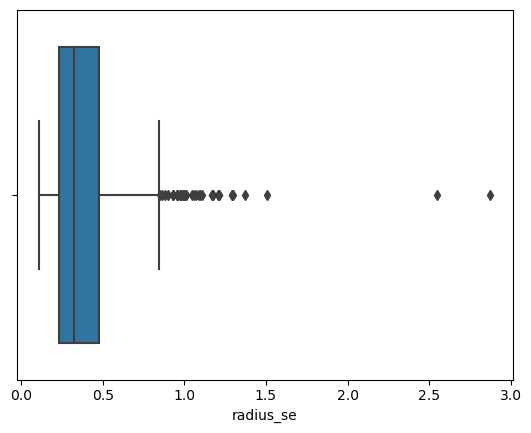

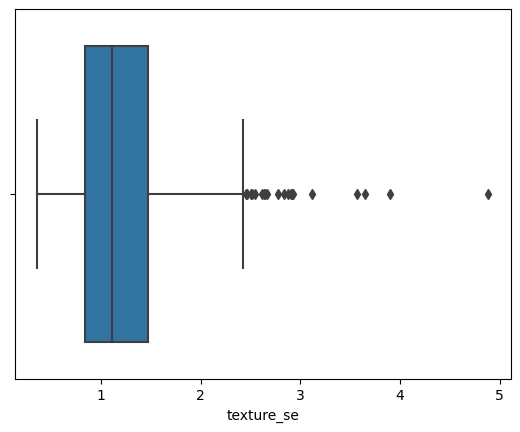

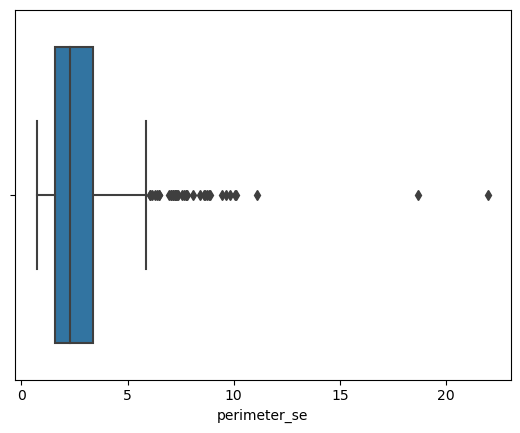

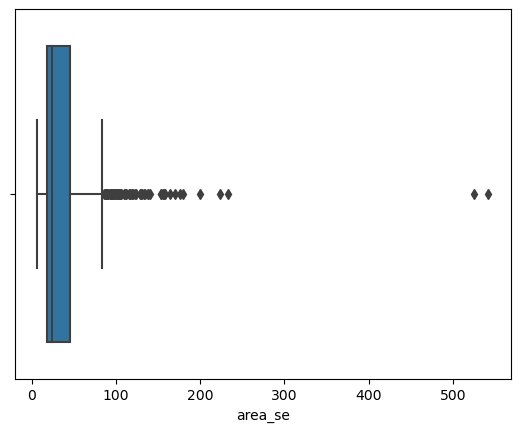

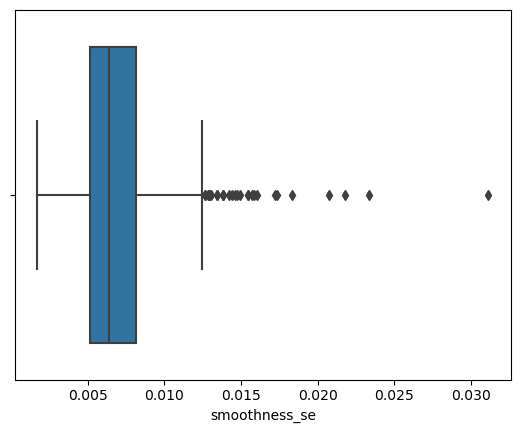

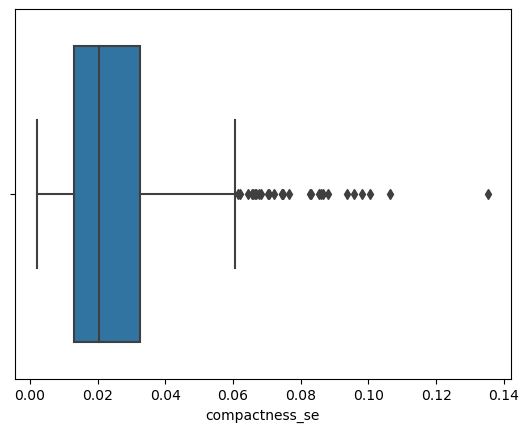

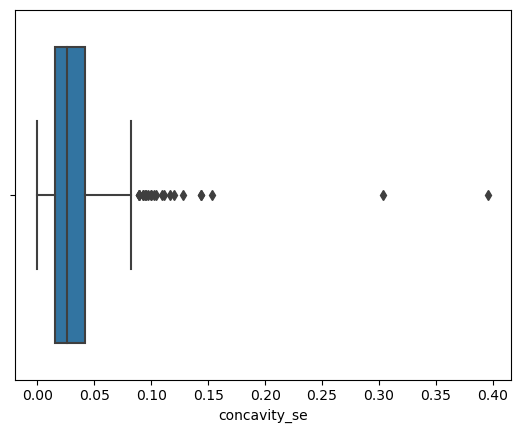

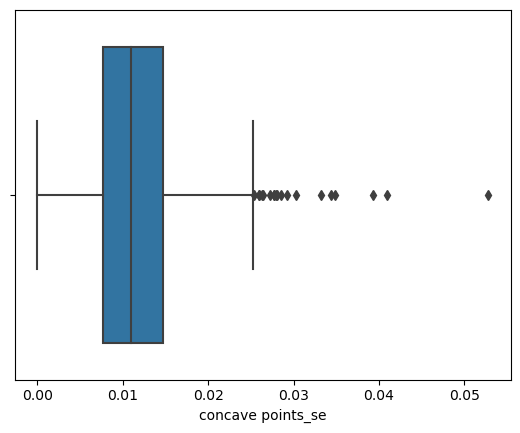

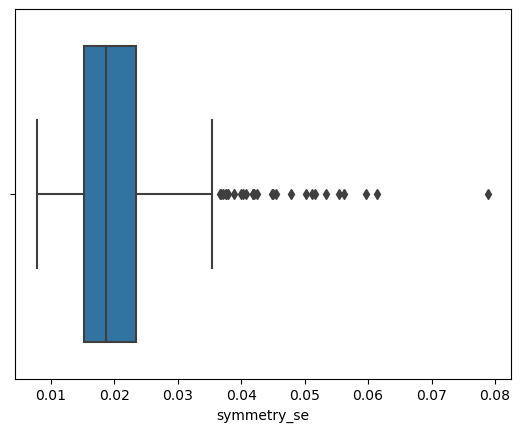

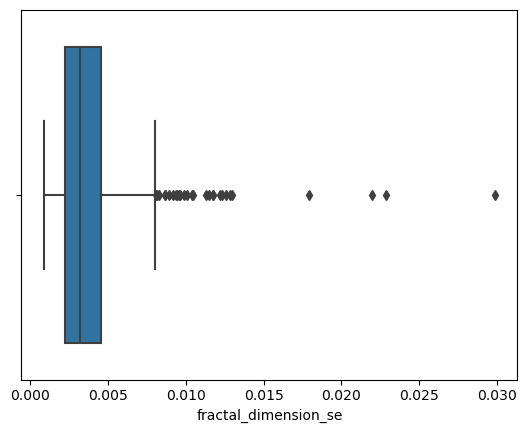

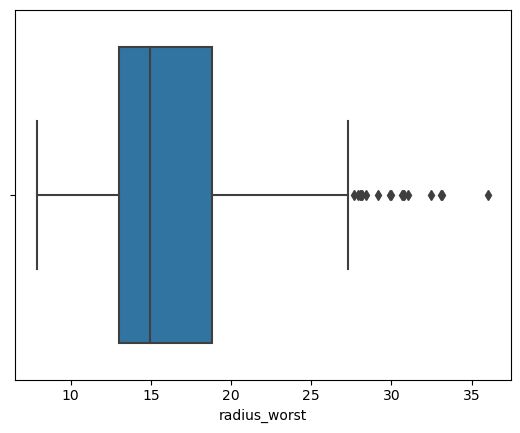

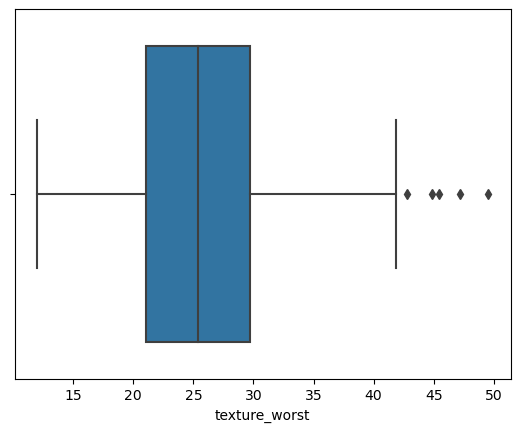

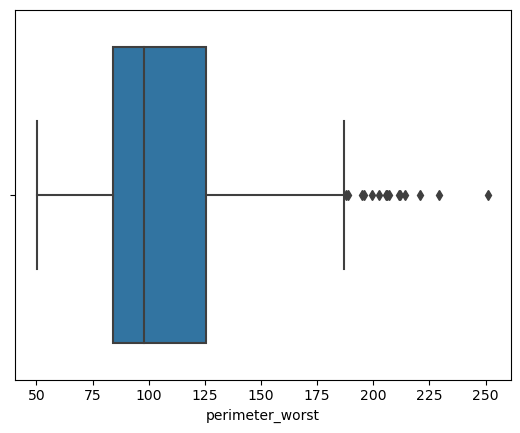

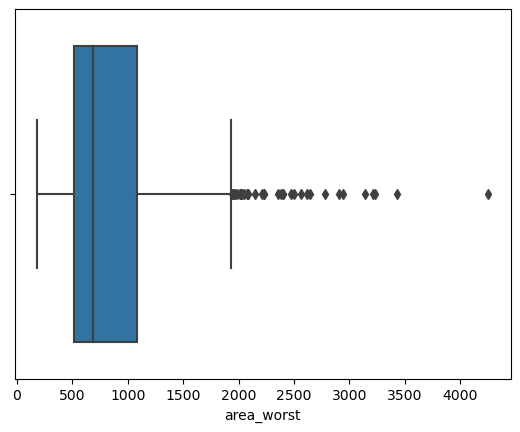

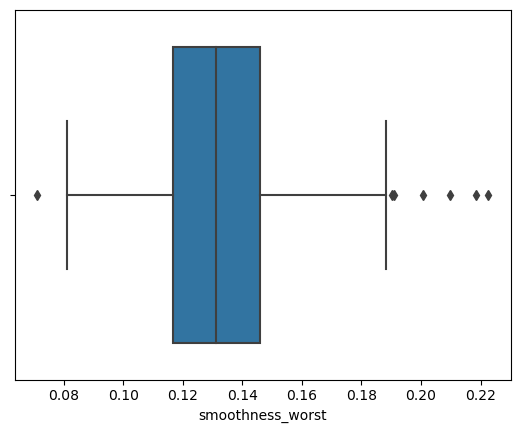

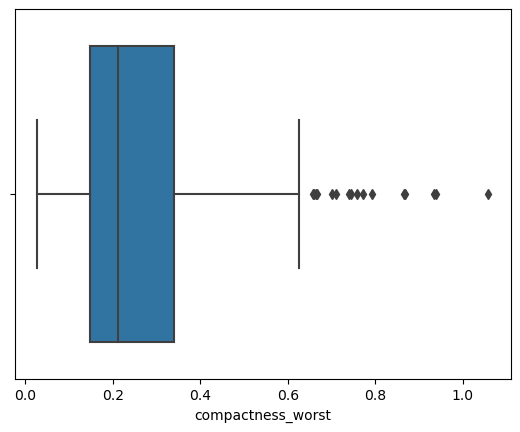

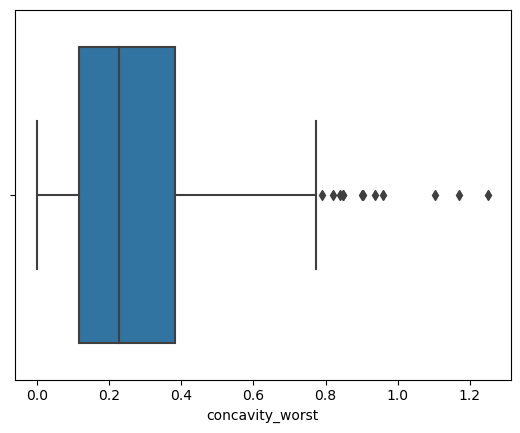

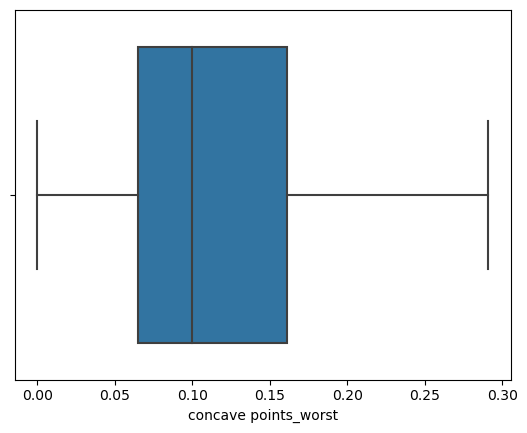

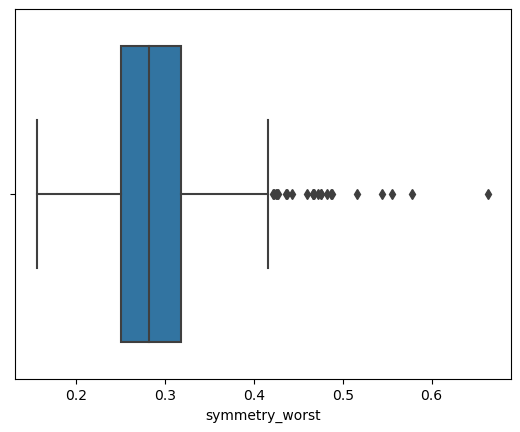

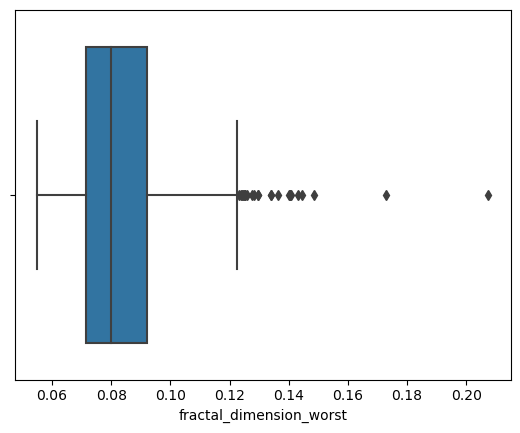

In [22]:
for i in numeric_columns:
    sns.boxplot(data=df, x=i)
    print("\n")
    plt.show()

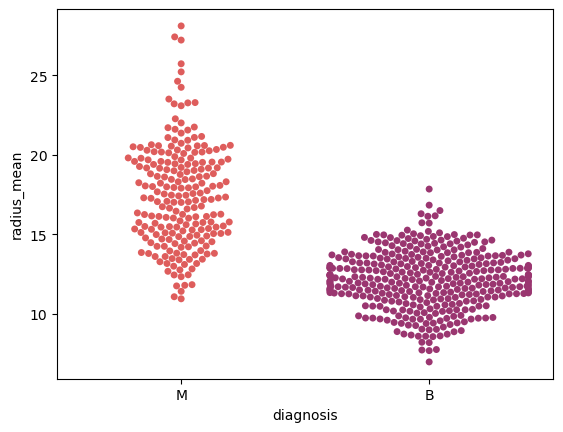

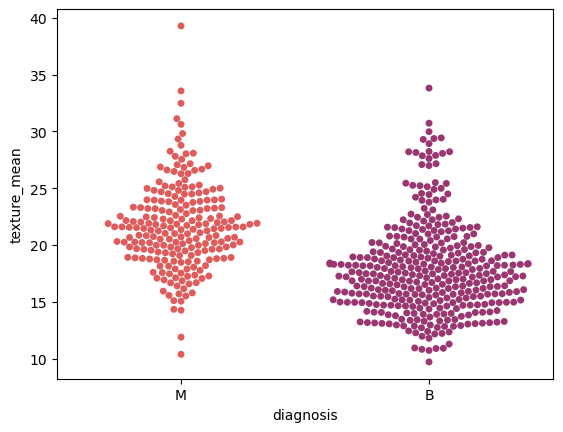

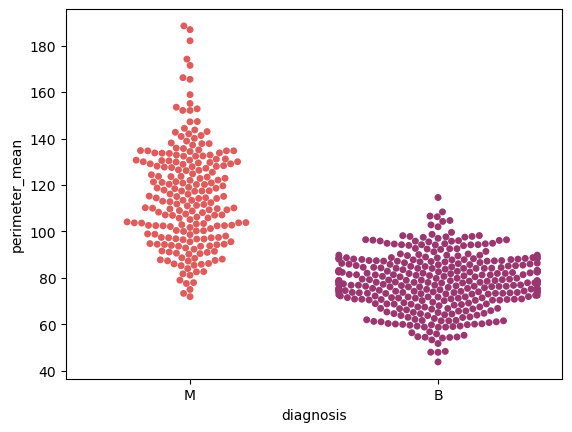

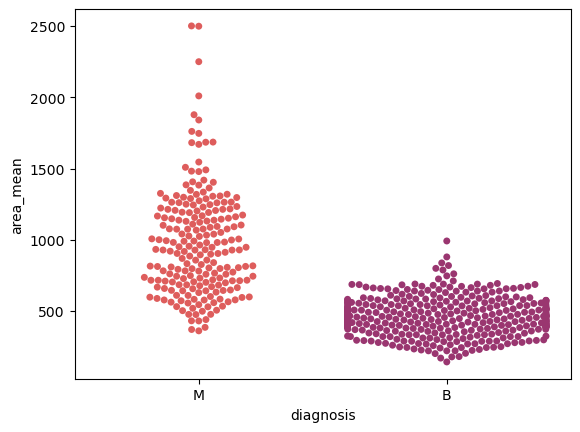

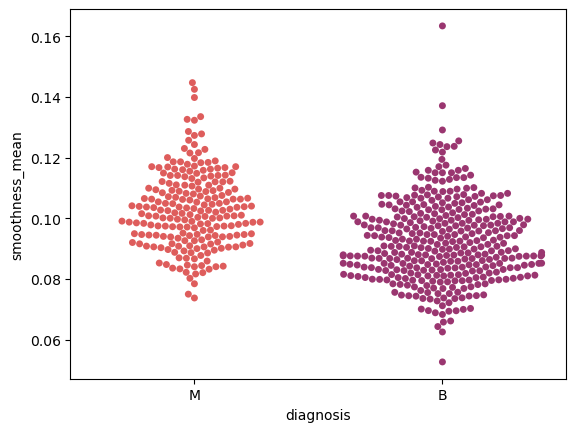

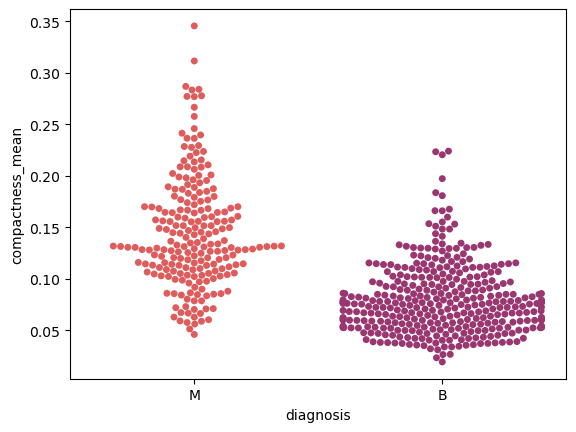

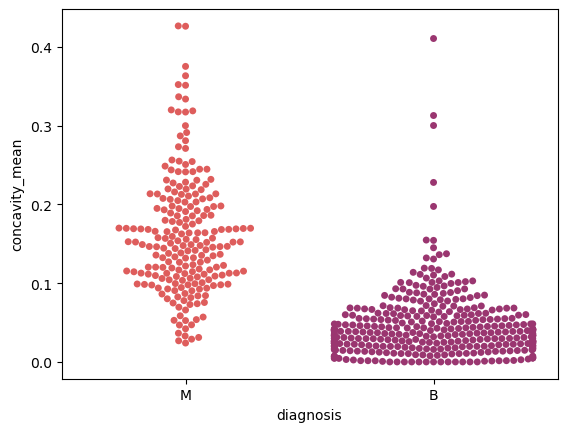

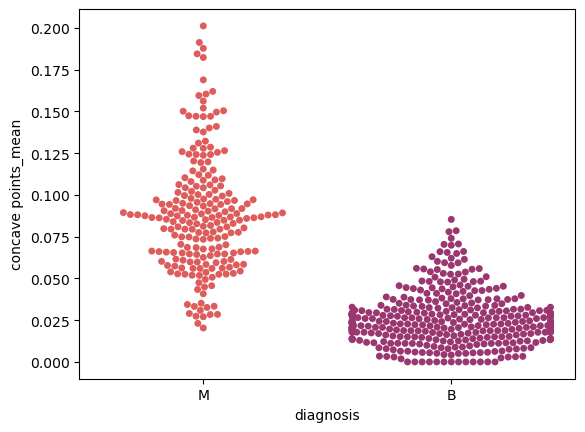

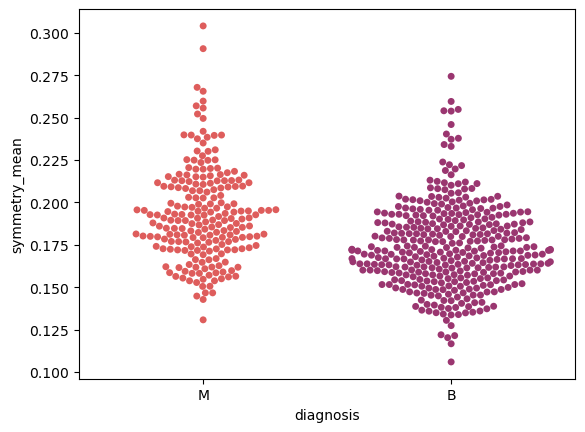

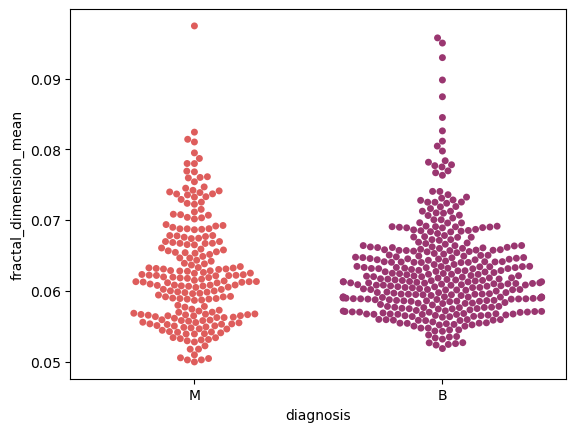

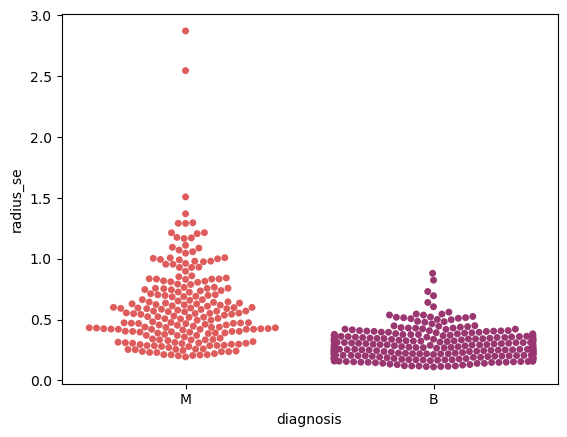

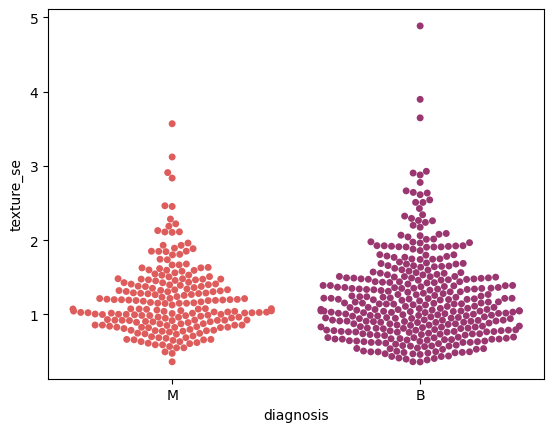

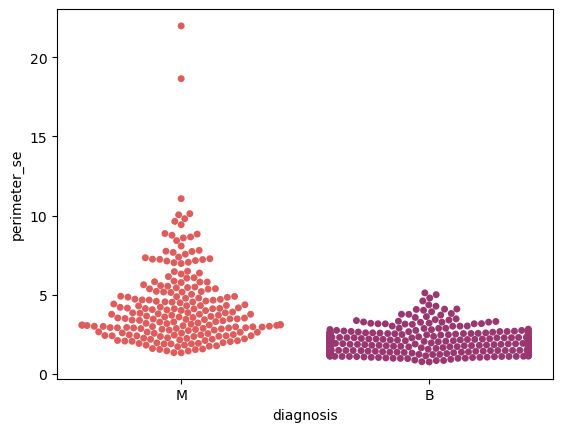

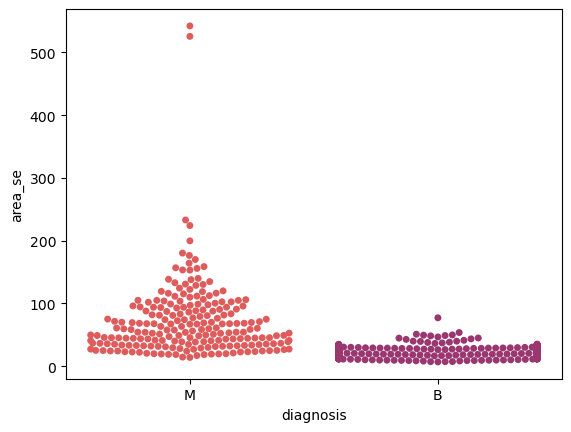

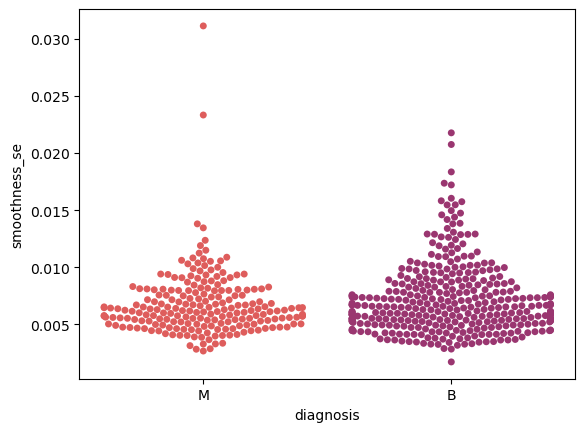

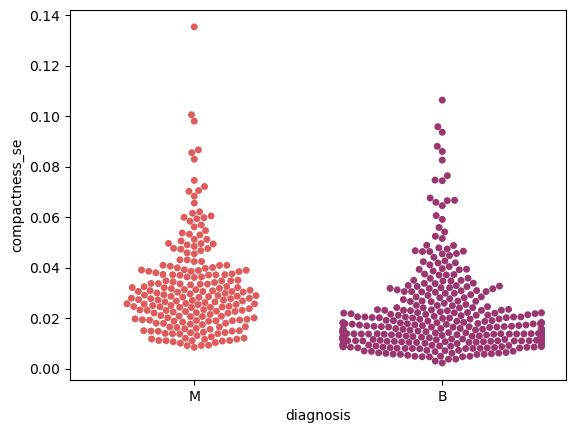

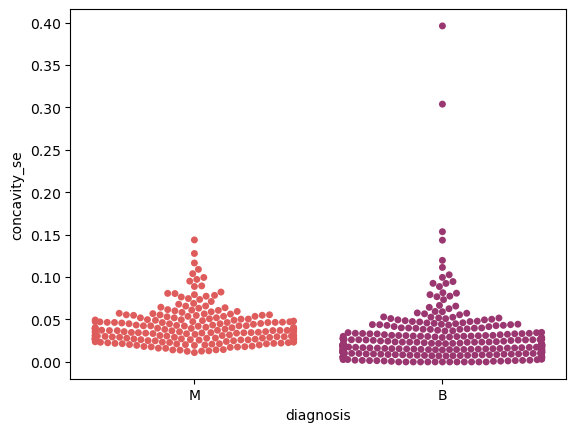

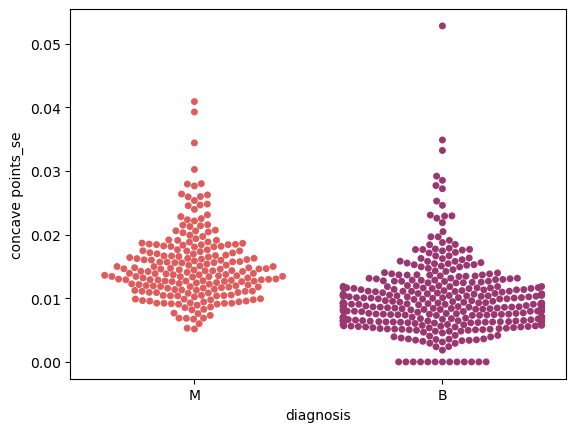

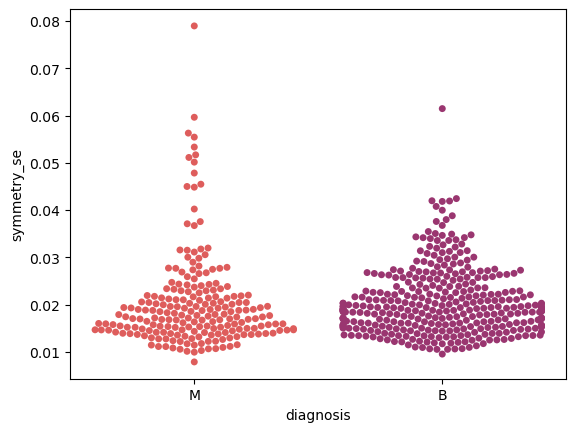

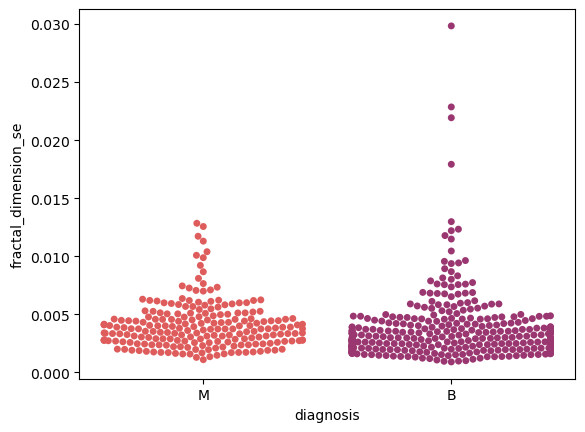

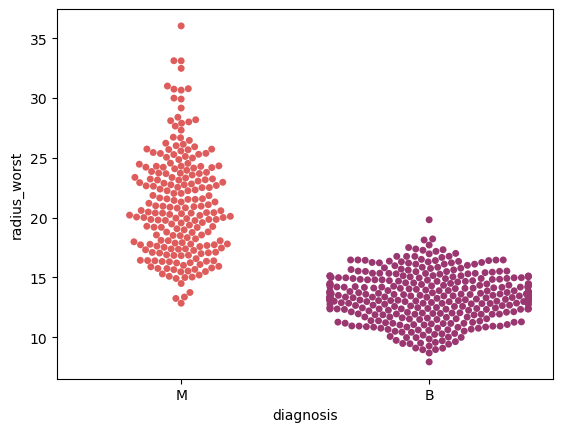

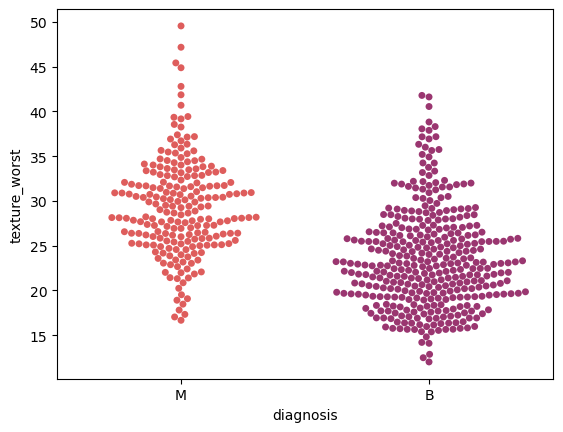

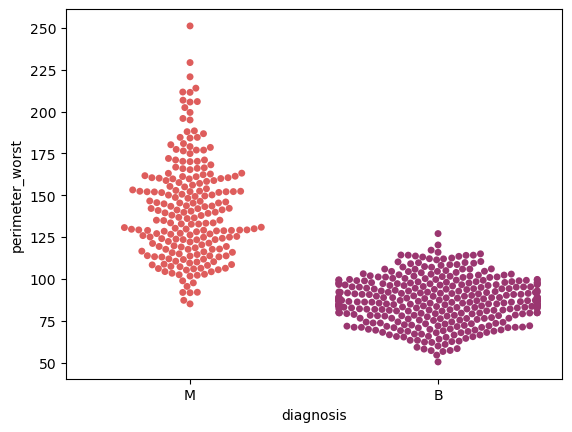

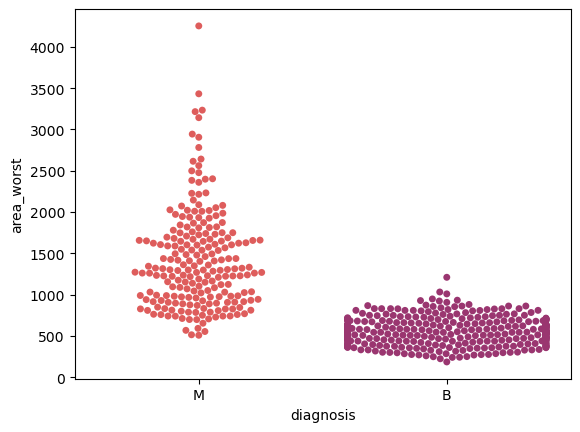

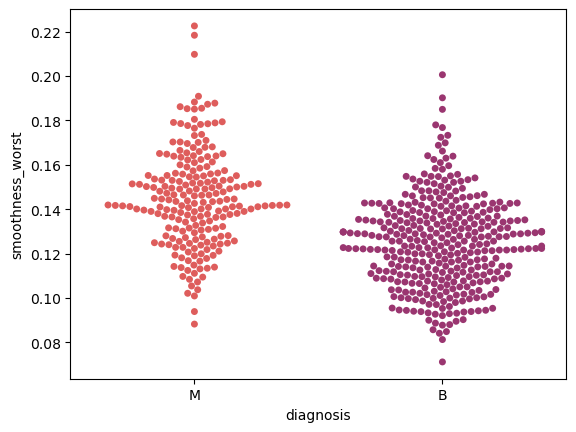

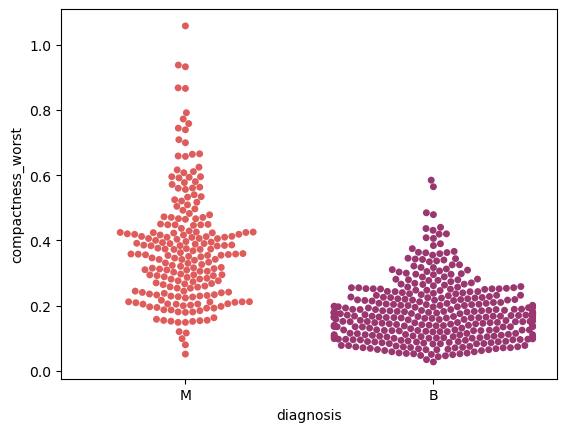

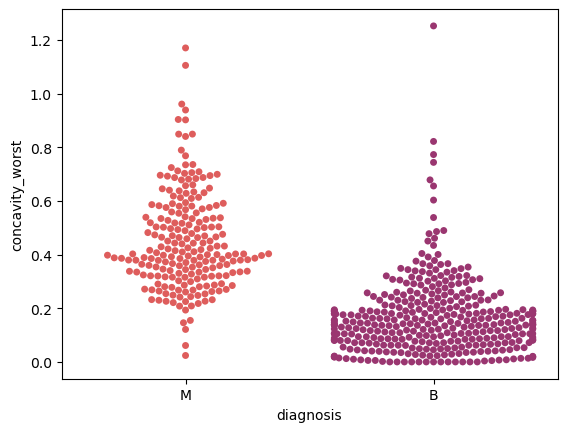

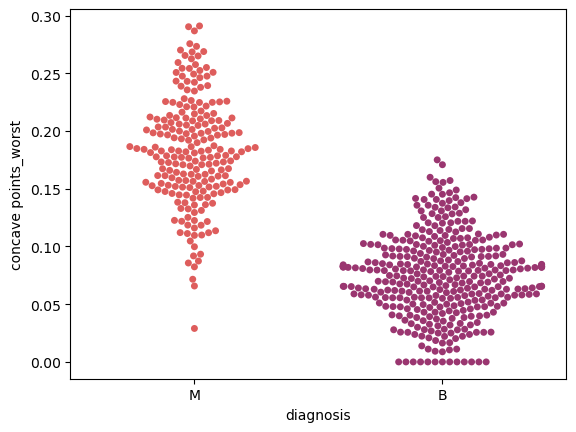

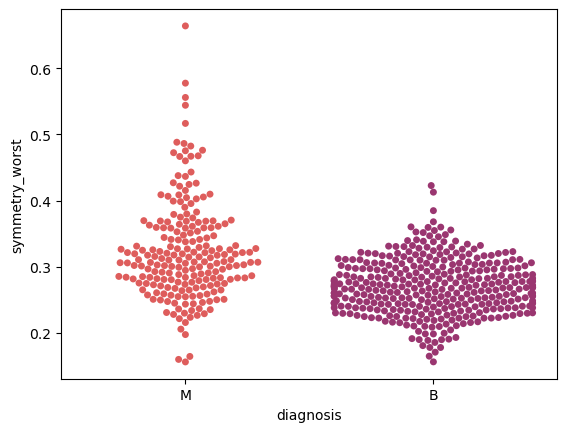

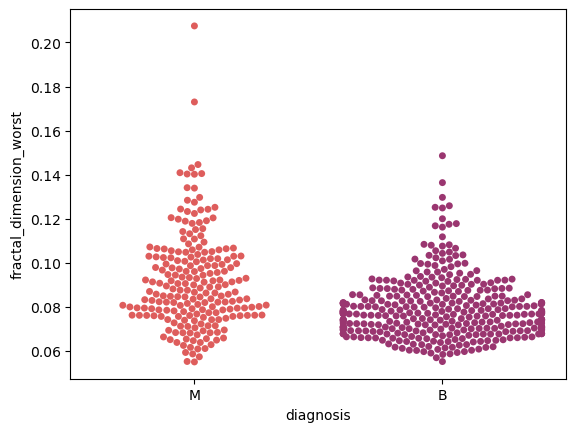

In [23]:
for i in numeric_columns:
    sns.swarmplot(x=df["diagnosis"], y=df[i], palette="flare" )
    plt.show()

### LETS CALUCLATE OUTLIERES PER COLUMNS

In [24]:
for i in numeric_columns:
    q1= df[i].quantile(0.25)
    q3= df[i].quantile(0.75)
    IQR=q3-q1
    lower_value=q1-(1.5 * IQR)
    higher_value=q3+(1.5 * IQR)
    count=df[df[i]<lower_value].shape[0] + df[df[i]>higher_value].shape[0]
    if count>0:
        outlier_percentage=count/df[i].shape[0]
        print(f"% of outliers in {i} is {outlier_percentage*100}")

% of outliers in radius_mean is 2.460456942003515
% of outliers in texture_mean is 1.2302284710017575
% of outliers in perimeter_mean is 2.2847100175746924
% of outliers in area_mean is 4.393673110720562
% of outliers in smoothness_mean is 1.054481546572935
% of outliers in compactness_mean is 2.8119507908611596
% of outliers in concavity_mean is 3.163444639718805
% of outliers in concave points_mean is 1.7574692442882252
% of outliers in symmetry_mean is 2.6362038664323375
% of outliers in fractal_dimension_mean is 2.6362038664323375
% of outliers in radius_se is 6.6783831282952555
% of outliers in texture_se is 3.5149384885764503
% of outliers in perimeter_se is 6.6783831282952555
% of outliers in area_se is 11.423550087873462
% of outliers in smoothness_se is 5.272407732864675
% of outliers in compactness_se is 4.92091388400703
% of outliers in concavity_se is 3.8664323374340945
% of outliers in concave points_se is 3.3391915641476277
% of outliers in symmetry_se is 4.74516695957820

### we can see that except diagnosis column everything is in numeric so we will chanege the data type of diagnosis to numeric 

In [25]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

In [26]:
df["diagnosis"]=le.fit_transform(df["diagnosis"])

In [27]:
df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            1        17.99         10.38          122.80     1001.0   
1            1        20.57         17.77          132.90     1326.0   
2            1        19.69         21.25          130.00     1203.0   
3            1        11.42         20.38           77.58      386.1   
4            1        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564          1        21.56         22.39          142.00     1479.0   
565          1        20.13         28.25          131.20     1261.0   
566          1        16.60         28.08          108.30      858.1   
567          1        20.60         29.33          140.10     1265.0   
568          0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    .

In [28]:
df["diagnosis"].nunique()

2

### LETS TAKE X AN Y AS DEPENDANT AND INDEPENDENT VARIABLES RESPECTIVELY

In [29]:
x=df.drop("diagnosis", axis=1)
y=df["diagnosis"]

In [30]:
x

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
0                   0.07871  ...        25.380          17.33   
1                   0.05667  ...        24.990          23.41   
2                   0.05999  ...        23.570          25.53   
3                   0.09744  ...        14.910          26.50   
4                   0.05883  ...        22.540          16.67   
..                      ...  ...           ...            ...   
564                 0.05623  ...        25.450          26.40   
565                 0.05533  ...        23.690          38.25   
566                 0.05648  ...        18.980          34.12   
567                 0.07016  ...        25.740          39.42   
568                 0.05884  ...         9.456          30.37   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0             184.60      2019.0           0.16220            0.66560   
1             158.80      1956.0           0.12380            0.18660   
2             152.50      1709.0           0.14440            0.42450   
3              98.87       567.7           0.20980            0.86630   
4             152.20      1575.0           0.13740            0.20500   
..               ...         ...               ...                ...   
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     concavity_worst  concave points_worst  symmetry_worst  \
0             0.7119                0.2654          0.4601   
1             0.2416                0.1860          0.2750   
2             0.4504                0.2430          0.3613   
3             0.6869                0.2575          0.6638   
4             0.4000                0.1625          0.2364   
..               ...                   ...             ...   
564           0.4107                0.2216         

In [31]:
x.shape

(569, 30)

In [32]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

In [33]:
y.shape

(569,)

## Lets import train test split

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=0)

# **1st Approch** 

### we will use the same data set as it is and observe the resuls of models

# Lets create models

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier

from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [37]:
training_models={
    "LogisticRegression":LogisticRegression(),
    "SVC":SVC(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "KNeighborsClassifier":KNeighborsClassifier(),
    "GaussianNB":GaussianNB(),
    "AdaBoostClassifier":AdaBoostClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
    
}

In [38]:
for name, model in training_models.items():
    model.fit(x_train,y_train)
    print(f"{model} has been trained")

LogisticRegression() has been trained
SVC() has been trained
DecisionTreeClassifier() has been trained
KNeighborsClassifier() has been trained
GaussianNB() has been trained
AdaBoostClassifier() has been trained
GradientBoostingClassifier() has been trained
RandomForestClassifier() has been trained


In [39]:
for name, model in training_models.items():
    print("model name:  ",model)
    y_predict1=model.predict(x_train)
    sc1=accuracy_score(y_predict1, y_train)
    print(model," train score",sc1)
    y_predict2=model.predict(x_test)
    sc2=accuracy_score(y_predict2, y_test)
    print(model,"test score",sc2)
    print(classification_report(y_test, y_predict2))
    print(confusion_matrix(y_test, y_predict2))
    print("\n")

model name:   LogisticRegression()
LogisticRegression()  train score 0.9516483516483516
LogisticRegression() test score 0.9473684210526315
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        67
           1       0.92      0.96      0.94        47

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114

[[63  4]
 [ 2 45]]


model name:   SVC()
SVC()  train score 0.9098901098901099
SVC() test score 0.9298245614035088
              precision    recall  f1-score   support

           0       0.90      0.99      0.94        67
           1       0.98      0.85      0.91        47

    accuracy                           0.93       114
   macro avg       0.94      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114

[[66  1]
 [ 7 40]]


model name:   DecisionTreeClassifier()
DecisionTreeClassifier()  train 

### ---------------------------------------------------------------------------------------------------------------------------

##                        Approach 2

### NORMALZATION USING MINMAXSCALER

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
x

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
338       10.050         17.53           64.41      310.8          0.10070   
427       10.800         21.98           68.79      359.9          0.08801   
406       16.140         14.86          104.30      800.0          0.09495   
96        12.180         17.84           77.79      451.1          0.10450   
490       12.250         22.44           78.18      466.5          0.08192   
..           ...           ...             ...        ...              ...   
277       18.810         19.98          120.90     1102.0          0.08923   
9         12.460         24.04           83.97      475.9          0.11860   
359        9.436         18.32           59.82      278.6          0.10090   
192        9.720         18.22           60.73      288.1          0.06950   
559       11.510         23.93           74.52      403.5          0.09261   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
338           0.07326         0.02511              0.01775         0.1890   
427           0.05743         0.03614              0.01404         0.2016   
406           0.08501         0.05500              0.04528         0.1735   
96            0.07057         0.02490              0.02941         0.1900   
490           0.05200         0.01714              0.01261         0.1544   
..                ...             ...                  ...            ...   
277           0.05884         0.08020              0.05843         0.1550   
9             0.23960         0.22730              0.08543         0.2030   
359           0.05956         0.02710              0.01406         0.1506   
192           0.02344         0.00000              0.00000         0.1653   
559           0.10210         0.11120              0.04105         0.1388   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
338                 0.06331  ...        11.160          26.84   
427                 0.05977  ...        12.760          32.04   
406                 0.05875  ...        17.710          19.58   
96                  0.06635  ...        12.830          20.92   
490                 0.05976  ...        14.170          31.99   
..                      ...  ...           ...            ...   
277                 0.04996  ...        19.960          24.30   
9                   0.08243  ...        15.090          40.68   
359                 0.06959  ...        12.020          25.02   
192                 0.06447  ...         9.968          20.83   
559                 0.06570  ...        12.480          37.16   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
338            71.98       384.0           0.14020            0.14020   
427            83.69       489.5           0.13030            0.16960   
406           115.90       947.9           0.12060            0.17220   
96             82.14       495.2           0.11400            0.09358   
490            92.74       622.9           0.12560            0.18040   
..               ...         ...               ...                ...   
277           129.00      1236.0           0.12430            0.11600   
9              97.65       711.4           0.18530            1.05800   
359            75.79       439.6           0.13330            0.10490   
192            62.25       303.8           0.07117            0.02729   
559            82.28       474.2           0.12980            0.25170   

     concavity_worst  concave points_worst  symmetry_worst  \
338           0.1055               0.06499          0.2894   
427           0.1927               0.07485          0.2965   
406           0.2310               0.11290          0.2778   
96            0.0498               0.05882          0.2227   
490           0.1230               0.06335          0.3100   
..               ...                   ...             ...   
277           0.2210               0.12940         

In [42]:
normalization= MinMaxScaler()
norm_x= normalization.fit_transform(x)
norm_x

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

### LETS assign these normalised independent variables to train test split

In [43]:
x_train,x_test,y_train,y_test= train_test_split(norm_x,y) 

### Lets check the data whether all the variables are in the form of zero or not

In [44]:
x_train

array([[0.59392304, 0.31078796, 0.59228802, ..., 0.68041237, 0.27656219,
        0.29024006],
       [0.36438071, 0.35238417, 0.35208348, ..., 0.55292096, 0.28858664,
        0.17788272],
       [0.32367836, 0.49983091, 0.33542948, ..., 0.52268041, 0.41119653,
        0.41492851],
       ...,
       [0.19778503, 0.39567129, 0.18768572, ..., 0.14797251, 0.27813917,
        0.10619179],
       [0.1930522 , 0.17754481, 0.19141732, ..., 0.36941581, 0.34220382,
        0.23455333],
       [0.22239576, 0.21846466, 0.21905881, ..., 0.33728522, 0.24423418,
        0.16528926]])

In [45]:
x_test

array([[0.46660987, 0.32972607, 0.44647917, ..., 0.28989691, 0.18963138,
        0.03069658],
       [0.4348999 , 0.21508285, 0.43196738, ..., 0.42989691, 0.31302977,
        0.22668241],
       [0.32746462, 0.3222861 , 0.31055214, ..., 0.28006873, 0.15592352,
        0.13767546],
       ...,
       [0.56883904, 0.31112614, 0.55013475, ..., 0.4185567 , 0.2515277 ,
        0.06801784],
       [0.18547967, 0.10990869, 0.17206827, ..., 0.13584192, 0.23122413,
        0.14305392],
       [0.1566094 , 0.60534325, 0.15119895, ..., 0.31364261, 0.13029765,
        0.18227732]])

### In the above 2 cells we can see that x_train and x_test are in the form of 0 to 1

In [46]:
y_train.value_counts()

0    264
1    162
Name: diagnosis, dtype: int64

In [47]:
y_test.value_counts()

0    93
1    50
Name: diagnosis, dtype: int64

### Lets train the data set

In [48]:
for name, model in training_models.items():
    model.fit(x_train,y_train)
    print(f"{model} has been trained")

LogisticRegression() has been trained
SVC() has been trained
DecisionTreeClassifier() has been trained
KNeighborsClassifier() has been trained
GaussianNB() has been trained
AdaBoostClassifier() has been trained
GradientBoostingClassifier() has been trained
RandomForestClassifier() has been trained


### check the scores

In [49]:
for name, model in training_models.items():
    print("model name:  ",model)
    y_predict1=model.predict(x_train)
    sc1=accuracy_score(y_predict1, y_train)
    print(model," train score",sc1)
    y_predict2=model.predict(x_test)
    sc2=accuracy_score(y_predict2, y_test)
    print(model,"test score",sc2)
    print(classification_report(y_test, y_predict2))
    print(confusion_matrix(y_test, y_predict2))
    print("\n")

model name:   LogisticRegression()
LogisticRegression()  train score 0.9694835680751174
LogisticRegression() test score 0.965034965034965
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        93
           1       1.00      0.90      0.95        50

    accuracy                           0.97       143
   macro avg       0.97      0.95      0.96       143
weighted avg       0.97      0.97      0.96       143

[[93  0]
 [ 5 45]]


model name:   SVC()
SVC()  train score 0.9859154929577465
SVC() test score 0.986013986013986
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        93
           1       1.00      0.96      0.98        50

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.98       143
weighted avg       0.99      0.99      0.99       143

[[93  0]
 [ 2 48]]


model name:   DecisionTreeClassifier()
DecisionTreeClassifier()  train sc

### In the above 2 cells we can see that x_train and x_test are in the form of 0 to 1

### ---------------------------------------------------------------------------------------------------------------------------

##                        Approach 3

### STANDARDIZATION USING SKLEARN

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
stsc = StandardScaler()

In [52]:
stsc_x = stsc.fit_transform(x)

In [53]:
stsc_x

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

### LETS assign these standardized independent variables to train test split

In [54]:
x_train,x_test,y_train,y_test= train_test_split(norm_x,y) 

### Lets check the data 

In [55]:
x_train

array([[0.4012968 , 0.33040243, 0.40017967, ..., 0.52027491, 0.25073921,
        0.1649613 ],
       [0.20346443, 0.12445046, 0.20185198, ..., 0.29591065, 0.10585452,
        0.08395645],
       [0.36012116, 0.43862022, 0.36348559, ..., 0.37972509, 0.13660556,
        0.16397744],
       ...,
       [0.27871646, 0.21981738, 0.26667127, ..., 0.19862543, 0.4019318 ,
        0.10219074],
       [0.47654882, 0.31687521, 0.48103103, ..., 0.87388316, 0.3043564 ,
        0.2333071 ],
       [0.26404468, 0.31653703, 0.2634925 , ..., 0.31838488, 0.10959984,
        0.1104552 ]])

In [56]:
x_test

array([[0.29480808, 0.52553263, 0.27855711, ..., 0.20635739, 0.17327025,
        0.08421881],
       [0.6682285 , 0.36557322, 0.65171723, ..., 0.78350515, 0.13857678,
        0.12600026],
       [0.0336031 , 0.53195807, 0.03144219, ..., 0.17182131, 0.24147447,
        0.33818707],
       ...,
       [0.33503715, 0.2526209 , 0.31760072, ..., 0.27185567, 0.18884289,
        0.07247803],
       [0.37289981, 0.24450457, 0.35312003, ..., 0.27391753, 0.18923714,
        0.08677686],
       [0.11756354, 0.38214406, 0.11277728, ..., 0.22395189, 0.25882121,
        0.24314574]])

In [57]:
y_train.value_counts()

0    275
1    151
Name: diagnosis, dtype: int64

In [58]:
y_test.value_counts()

0    82
1    61
Name: diagnosis, dtype: int64

### Lets train the data set

In [59]:
for name, model in training_models.items():
    model.fit(x_train,y_train)
    print(f"{model} has been trained")

LogisticRegression() has been trained
SVC() has been trained
DecisionTreeClassifier() has been trained
KNeighborsClassifier() has been trained
GaussianNB() has been trained
AdaBoostClassifier() has been trained
GradientBoostingClassifier() has been trained
RandomForestClassifier() has been trained


### check the scores

In [60]:
for name, model in training_models.items():
    print("model name:  ",model)
    y_predict1=model.predict(x_train)
    sc1=accuracy_score(y_predict1, y_train)
    print(model," train score",sc1)
    y_predict2=model.predict(x_test)
    sc2=accuracy_score(y_predict2, y_test)
    print(model,"test score",sc2)
    print(classification_report(y_test, y_predict2))
    print(confusion_matrix(y_test, y_predict2))
    print("\n")

model name:   LogisticRegression()
LogisticRegression()  train score 0.9741784037558685
LogisticRegression() test score 0.951048951048951
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        82
           1       0.98      0.90      0.94        61

    accuracy                           0.95       143
   macro avg       0.96      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143

[[81  1]
 [ 6 55]]


model name:   SVC()
SVC()  train score 0.9859154929577465
SVC() test score 0.972027972027972
              precision    recall  f1-score   support

           0       0.96      0.99      0.98        82
           1       0.98      0.95      0.97        61

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

[[81  1]
 [ 3 58]]


model name:   DecisionTreeClassifier()
DecisionTreeClassifier()  train sc

### ---------------------------------------------------------------------------------------------------------------------------

##                        Approach 4
## Lets do under sampling and over sampling

### under sampling

In [61]:
from imblearn.under_sampling import RandomUnderSampler

In [62]:
rus=RandomUnderSampler()

In [63]:
x_rus,y_rus= rus.fit_resample(x,y)

In [64]:
print("shape of independent variable before under-sampling",x.shape)
print("shape of dependent variable before under-sampling",y.shape)
print("\n")
print("shape of independent variable after under-sampling",x_rus.shape)
print("shape of dependent variable after under-sampling",y_rus.shape)

shape of independent variable before under-sampling (569, 30)
shape of dependent variable before under-sampling (569,)


shape of independent variable after under-sampling (424, 30)
shape of dependent variable after under-sampling (424,)


#### lets bifurcate 0 (non-cancerous) & 1 (cancerous)

In [65]:
y.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

#### in above cell we can see that there are 357 non cancerous and 212 cancerous before sampling

In [66]:
y_rus.value_counts()

0    212
1    212
Name: diagnosis, dtype: int64

#### in above cell we can see that there are 212 non cancerous and 212 cancerous after sampling

In [67]:
x_train,x_test,y_train,y_test= train_test_split(x_rus,y_rus) 

In [68]:
for name, model in training_models.items():
    model.fit(x_train,y_train)
    print(f"{model} has been trained")

LogisticRegression() has been trained
SVC() has been trained
DecisionTreeClassifier() has been trained
KNeighborsClassifier() has been trained
GaussianNB() has been trained
AdaBoostClassifier() has been trained
GradientBoostingClassifier() has been trained
RandomForestClassifier() has been trained


In [69]:
for name, model in training_models.items():
    print("model name:  ",model)
    y_predict1=model.predict(x_train)
    sc1=accuracy_score(y_predict1, y_train)
    print(model," train score",sc1)
    y_predict2=model.predict(x_test)
    sc2=accuracy_score(y_predict2, y_test)
    print(model,"test score",sc2)
    print(classification_report(y_test, y_predict2))
    print(confusion_matrix(y_test, y_predict2))
    print("\n")

model name:   LogisticRegression()
LogisticRegression()  train score 0.9276729559748428
LogisticRegression() test score 0.9622641509433962
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        54
           1       0.93      1.00      0.96        52

    accuracy                           0.96       106
   macro avg       0.96      0.96      0.96       106
weighted avg       0.96      0.96      0.96       106

[[50  4]
 [ 0 52]]


model name:   SVC()
SVC()  train score 0.89937106918239
SVC() test score 0.9150943396226415
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        54
           1       0.94      0.88      0.91        52

    accuracy                           0.92       106
   macro avg       0.92      0.91      0.91       106
weighted avg       0.92      0.92      0.91       106

[[51  3]
 [ 6 46]]


model name:   DecisionTreeClassifier()
DecisionTreeClassifier()  train sc

### Lets do over sampling

In [70]:
from imblearn.over_sampling import RandomOverSampler

In [71]:
ros= RandomOverSampler()
x_ros,y_ros= ros.fit_resample(x,y)

In [72]:
print("shape of independent variable before under-sampling",x.shape)
print("shape of dependent variable before under-sampling",y.shape)
print("\n")
print("shape of independent variable after under-sampling",x_ros.shape)
print("shape of dependent variable after under-sampling",y_ros.shape)

shape of independent variable before under-sampling (569, 30)
shape of dependent variable before under-sampling (569,)


shape of independent variable after under-sampling (714, 30)
shape of dependent variable after under-sampling (714,)


#### lets bifurcate 0 (non-cancerous) & 1 (cancerous)

In [73]:
y.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

#### in above cell we can see that there are 357 non cancerous and 212 cancerous before sampling

In [74]:
y_ros.value_counts()

1    357
0    357
Name: diagnosis, dtype: int64

#### in above cell we can see that there are 357 non cancerous and 357 cancerous after sampling

In [75]:
x_train,x_test,y_train,y_test= train_test_split(x_ros,y_ros)
for name, model in training_models.items():
    model.fit(x_train,y_train)
    print(f"{model} has been trained")

LogisticRegression() has been trained
SVC() has been trained
DecisionTreeClassifier() has been trained
KNeighborsClassifier() has been trained
GaussianNB() has been trained
AdaBoostClassifier() has been trained
GradientBoostingClassifier() has been trained
RandomForestClassifier() has been trained


In [76]:
for name, model in training_models.items():
    print("model name:  ",model)
    y_predict1=model.predict(x_train)
    sc1=accuracy_score(y_predict1, y_train)
    print(model," train score",sc1)
    y_predict2=model.predict(x_test)
    sc2=accuracy_score(y_predict2, y_test)
    print(model,"test score",sc2)
    print(classification_report(y_test, y_predict2))
    print(confusion_matrix(y_test, y_predict2))
    print("\n")

model name:   LogisticRegression()
LogisticRegression()  train score 0.9495327102803738
LogisticRegression() test score 0.9217877094972067
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        89
           1       0.91      0.93      0.92        90

    accuracy                           0.92       179
   macro avg       0.92      0.92      0.92       179
weighted avg       0.92      0.92      0.92       179

[[81  8]
 [ 6 84]]


model name:   SVC()
SVC()  train score 0.8990654205607477
SVC() test score 0.888268156424581
              precision    recall  f1-score   support

           0       0.85      0.94      0.89        89
           1       0.94      0.83      0.88        90

    accuracy                           0.89       179
   macro avg       0.89      0.89      0.89       179
weighted avg       0.89      0.89      0.89       179

[[84  5]
 [15 75]]


model name:   DecisionTreeClassifier()
DecisionTreeClassifier()  train s